# Used Car Sales in the United States

# Project Notebook
## BA780 Group 5

## Objective

The proposed project aims to comprehensively investigate the relationship between the features and condition of a car, and the price at which it is listed for sale on Craigslist. We seek to accomplish the following objectives:


*   Identify the main variables that influence
used car prices
*   Identify the geographic distribution of car listings and understand whether prices differ based on the location
*   Develop predictive models to forecast pricing patterns based on the features of a car

**Data Source:** We will draw upon the extensive dataset provided on Kaggle, which is regularly updated by a data scraper on Craigslist, created by Austin Reese. Because it is updated in its raw form, there is a lot of data cleaning needed. It can be accessed on this [link.](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)

**Motivation:** Recent strikes by auto-workers in the United States have halted the production of new cars at automobile manufacturers like Ford. This could increase used car sales. Analyses will provide meaningful insights and trends in pricing and market strategies, and enable both buyers and sellers to make a fair trade.

## Report Summary
Analyzing a robust dataset from Craigslist, initially teeming with over 400,000 rows, our data exploration unveiled a landscape rife with errors and outliers. Rigorous cleaning ensued, involving column drops, outlier removal, and meticulous value imputation. Within this data, we discerned a nuanced perspective on car pricing dynamics. Luxury brands like Ferrari, Tesla, and Aston Martin emerged as price influencers, skewing averages due to their scarcity on the platform. Notably, even second-hand offerings from these marques exceeded the median US salary. Our investigation further delved into geographical price distribution trends. Armed with these insights, we constructed an interactive predictive model utilizing multiple linear regression. This model, considering diverse car attributes, empowers users to gauge fair prices and align listings with historical trends, fostering transparency in online car transactions.








## Importing Libraries

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error

## Preliminary Data Exploration

In this section, we will read our dataset and seek a basic understanding of it.

### Mounting the Drive and Reading the data into Colab Using Pandas

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cars = pd.read_csv('gdrive/MyDrive/ba780-b05-fall23/vehicles.csv') # our main cars dataset
states = gpd.read_file('gdrive/MyDrive/ba780-b05-fall23/usa-states-census-2014.shp') # a supplementary dataset that we're using for our map
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppressing scientific notation

### Understanding the dataset

#### Data Dictionary
From within the cars dataset, below is a list of definitions for each column:
1. **id** - This is the unique id of the car ad listing on Craigslist
2. **url** - This is the url of the listing
3. **region** - This is the specific city where the listing is from
4. **region_url** - This is the Craigslist url for sales in the region
5. **price** - This is the price of the car in USD
6. **year** - This is the year that the car was manufactured in
7. **manufacturer** - This is the manufacturer of the car
8. **model** - This is the specific model of the listed car
9. **condition** - This is the current condition of the listed car (New, Like New, Excellent, Good, Fair and Salvage)
10. **cylinders** - The number of cylinders in the car engine
11. **fuel** - This is the type of fuel used, like diesel, gas, electric etc.
12. **odometer** - This is the number of miles driven by the listed car
13. **title_status** - This is the legal status of the vehicle, e.g. "rebuilt" or "parts only"
14. **transmission** - This is the type of gearbox in the vehicle, e.g. automatic or manual.
15. **VIN** - This is the unique vehicle identification number
16. **drive** - This is the drivetrain of the car, such as a 4-wheeled drive
17. **size** - This is the size of the listed vehicle's body
18. **type** - This is the type of vehicle, such as truck, SUV, mini van etc.
19. **paint_colour** - This is the color of the car
20. **image_url** - This is the link the to the images posted for the car listing
21. **county** - This is the county where the listing is from
22. **state** - The state abbreviation for the car listing
23. **lat** - The latitude in decimal degrees where the sale is located
24. **long** - The longitude in decimal degrees where the sale is located
25. **posting_date** - The date and time when the listing was posted

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

#### Data Description & Conversion from Scientific Notation into Readable Numbers

In [ ]:
cars.describe().apply(lambda s: s.apply('{0:.5f}'.format))

id             price          year        odometer  \
count      426880.00000      426880.00000  425675.00000    422480.00000   
mean   7311486634.22433       75199.03319    2011.23519     98043.33144   
std       4473170.41256    12182282.17360       9.45212    213881.50080   
min    7207408119.00000           0.00000    1900.00000         0.00000   
25%    7308143339.25000        5900.00000    2008.00000     37704.00000   
50%    7312620821.00000       13950.00000    2013.00000     85548.00000   
75%    7315253543.50000       26485.75000    2017.00000    133542.50000   
max    7317101084.00000  3736928711.00000    2022.00000  10000000.00000   

        county           lat          long  
count  0.00000  420331.00000  420331.00000  
mean       nan      38.49394     -94.74860  
std        nan       5.84153      18.36546  
min        nan     -84.12225    -159.82773  
25%        nan      34.60190    -111.93985  
50%        nan      39.15010     -88.43260  
75%        nan      42.39890     -80.83204  
max        nan      82.39082     173.88550

##Data Cleaning, Preprocessing and Exploratory Analysis

In this section, we will drop columns, remove outliers, modify some columns, remove some columns, and impute missing values.

###Dropping Inital Columns

We can see that there are 426,880 entries, with 26 columns spanning from different features of the car like the manufacturer and model, to its current condition, to its listed price, to the geographic details of the listing. \\
\
We can see that several columns have missing values. We then explored these in more depth. From these, we can see that:
1. The column **county** is NA for each row, so we can instantly drop
this.
2. We can also drop **region_url**, since we already have **region** to use for geographical analysis.
3. We can also drop **url** as that just references the ad listing, but doesn't actually tell us anything about the car.
4. We will also drop **title_status**
5. We can also drop **description** as it's mostly copy-pasted ad content



In [ ]:
cars = cars.drop(columns = ['county', 'region_url', 'url', 'description', 'title_status'])

We can now check the number of nulls in each column, along with the percentage of values in each column that are nulls. Too many nulls in categorical columns are not helpful for our analysis.

In [ ]:
cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
# to get the percentage of null values in each column
cars.isnull().mean() * 100

id              0.00000
region          0.00000
price           0.00000
year            0.28228
manufacturer    4.13371
model           1.23618
condition      40.78523
cylinders      41.62247
fuel            0.70582
odometer        1.03073
transmission    0.59876
VIN            37.72536
drive          30.58635
size           71.76748
type           21.75272
paint_color    30.50108
image_url       0.01593
state           0.00000
lat             1.53415
long            1.53415
posting_date    0.01593
dtype: float64

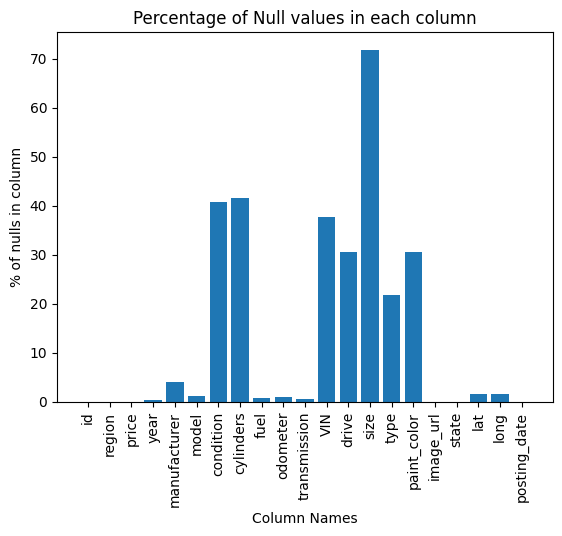

In [ ]:
null_percentage =  cars.isna().sum() / cars.shape[0] * 100
fig, ax = plt.subplots()
bars = ax.bar(x = cars.columns, height=round(null_percentage, 2))
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of Null values in each column")
plt.xlabel("Column Names")
plt.ylabel("% of nulls in column")
plt.show()

**Note: These were part of the cleaning process to help us visualize the data and are not part of our final visualizations**

###Dropping Rows

#### VIN
Each unique vehicle will have a unique **VIN**. It is possible that there might be repeated listings for the same vehicle. To bypass duplicates from skewing our analysis, we can drop rows that have duplicate **VIN** numbers. We can keep the latest listing as that would have the most updated price reflected in it.

In [ ]:
cars['VIN'].value_counts()

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
2G4GP5EX5E9213578      1
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
SAJGX2749VCOO8376      1
Name: VIN, Length: 118264, dtype: int64

This tells us that there are some cars that were listed multiple times, upto 261! We can pick one of the cars that was listed multiple times and look into it further.

In [ ]:
cars[cars['VIN'] == '1FTER1EH1LLA36301']

id                    region  price       year manufacturer  \
53      7314584322                    auburn  27990 2020.00000         ford   
577     7313343182                birmingham  27990 2020.00000         ford   
1896    7313775947                    dothan  27990 2020.00000         ford   
2179    7313871035  florence / muscle shoals  27990 2020.00000         ford   
2339    7314657320          gadsden-anniston  27990 2020.00000         ford   
...            ...                       ...    ...        ...          ...   
419280  7313896544                 la crosse  27990 2020.00000         ford   
420504  7312780750                   madison  27990 2020.00000         ford   
423571  7312727556                 milwaukee  27990 2020.00000         ford   
425340  7313313987                 sheboygan  27990 2020.00000         ford   
425759  7313268644                    wausau  27990 2020.00000         ford   

                            model condition cylinders fuel    odometer  ...  \
53      ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
577     ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
1896    ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
2179    ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
2339    ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
...                           ...       ...       ...  ...         ...  ...   
419280  ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
420504  ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
423571  ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
425340  ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   
425759  ranger supercab xl pickup      good       NaN  gas 10688.00000  ...   

                      VIN drive size    type paint_color  \
53      1FTER1EH1LLA36301   NaN  NaN  pickup       white   
577     1FTER1EH1LLA36301   NaN  NaN  pickup       white   
1896    1FTER1EH1LLA36301   NaN  NaN  pickup       white   
2179    1FTER1EH1LLA36301   NaN  NaN  pickup       white   
2339    1FTER1EH1LLA36301   NaN  NaN  pickup       white   
...                   ...   ...  ...     ...         ...   
419280  1FTER1EH1LLA36301   NaN  NaN  pickup       white   
420504  1FTER1EH1LLA36301   NaN  NaN  pickup       white   
423571  1FTER1EH1LLA36301   NaN  NaN  pickup       white   
425340  1FTER1EH1LLA36301   NaN  NaN  pickup       white   
425759  1FTER1EH1LLA36301   NaN  NaN  pickup       white   

                                                image_url state      lat  \
53      https://images.craigslist.org/01313_9Zne268YnW...    al 32.59000   
577     https://images.craigslist.org/01313_9Zne268YnW...    al 33.52000   
1896    https://images.craigslist.org/01313_9Zne268YnW...    al 31.23000   
2179    https://images.craigslist.org/01313_9Zne268YnW...    al 33.77921   
2339    https://images.craigslist.org/01313_9Zne268YnW...    al 34.01000   
...                                                   ...   ...      ...   
419280  https://images.craigslist.org/01313_9Zne268YnW...    wi 43.82000   
420504  https://images.craigslist.org/01313_9Zne268YnW...    wi 43.07000   
423571  https://images.craigslist.org/01313_9Zne268YnW...    wi 43.06000   
425340  https://images.craigslist.org/01313_9Zne268YnW...    wi 43.70000   
425759  https://images.craigslist.org/01313_9Zne268YnW...    wi 44.96000   

            long              posting_date  
53     -85.48000  2021-04-29T18:11:11-0500  
577    -86.79000  2021-04-27T10:41:23-0500  
1896   -85.40000  2021-04-28T08:31:33-0500  
2179   -84.41181  2021-04-28T11:21:26-0500  
2339   -86.01000  2021-04-29T21:41:33-0500  
...          ...                       ...  
419280 -91.23000  2021-04-28T12:01:04-0500  
420504 -89.38000  2021-04-26T09:31:05-0500  
423571 -87.96000  2021-04-26T07:38:07-0500  
425340 -87.74000  2021-04-27T09:51

The same car appears to have been listed multiple times in different regions, possibly to increase the seller's audience and likelihood of actually making a sale.

In [ ]:
print("The dataset has: " , len(cars.index), " rows before dropping duplicate VINs.")
cars = cars.drop_duplicates(subset='VIN', keep="last")
print("The dataset has: " , len(cars.index), " rows after dropping duplicate VINs.")

The dataset has:  426880  rows before dropping duplicate VINs.
The dataset has:  118265  rows after dropping duplicate VINs.


We can now look at the dataset as a whole again.

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118265 entries, 116 to 426879
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            118265 non-null  int64  
 1   region        118265 non-null  object 
 2   price         118265 non-null  int64  
 3   year          117671 non-null  float64
 4   manufacturer  115199 non-null  object 
 5   model         117565 non-null  object 
 6   condition     61116 non-null   object 
 7   cylinders     70335 non-null   object 
 8   fuel          116643 non-null  object 
 9   odometer      116732 non-null  float64
 10  transmission  117032 non-null  object 
 11  VIN           118264 non-null  object 
 12  drive         90865 non-null   object 
 13  size          30320 non-null   object 
 14  type          102203 non-null  object 
 15  paint_color   87505 non-null   object 
 16  image_url     118265 non-null  object 
 17  state         118265 non-null  object 
 18  la

As we know that duplicate listings have been removed by removing duplicate VINs, we can also drop the **VIN** column now as that isn't specifically needed for our analysis.

In [ ]:
cars = cars.drop(columns = ['VIN'])

#### Understanding and Removing Outliers

In [ ]:
# Max and Min Prices
print(cars['price'].max())
print(cars['price'].min())
print(cars['price'].mean())
print(cars['price'].median())

123456789
0
17905.503530207585
13000.0


The car's max price is clearly an outlier. There is also a noticeable difference between the mean and median prices, which signals outlier presence. We can now examine price in more detail, looking at prices that are = 0, <= 1000 and > 1000000

In [ ]:
print("Number of cars with price = 0:", cars[cars['price'] == 0].count()['price'])
print("Number of cars with price <= 1000:", cars[cars['price'] <= 1000].count()['price'])
print("Number of cars with price > 1000000:", cars[cars['price'] > 1000000].count()['price'])
print("Percentage of cars with prices < 100,000:", len(cars[cars['price'] < 1000000])/len(cars)*100)

Number of cars with price = 0: 12808
Number of cars with price <= 1000: 16897
Number of cars with price > 1000000: 4
Percentage of cars with prices < 100,000: 99.99577220648544


In [ ]:
cars[cars['price'] > 1000000] # looking at cars with price > 1000000 to understand the kinds of outliers

id      region      price       year manufacturer  \
105843  7314124996     orlando    6995495 2014.00000        dodge   
193736  7315524207   ann arbor  123456789 2015.00000    chevrolet   
194292  7307876060   ann arbor    1234567 2010.00000      lincoln   
303644  7302117601  youngstown   12345678 2019.00000    chevrolet   

               model condition    cylinders fuel     odometer transmission  \
105843       journey       NaN  4 cylinders  gas 135888.00000    automatic   
193736         cruze  like new          NaN  gas  64181.00000    automatic   
194292  mkt ecoboost  like new          NaN  gas  85653.00000    automatic   
303644           NaN      good  8 cylinders  gas 100000.00000    automatic   

       drive       size   type paint_color  \
105843   fwd        NaN    SUV         NaN   
193736   fwd    compact  sedan         red   
194292   NaN  full-size    SUV      custom   
303644   4wd  full-size  truck       black   

                                                image_url state      lat  \
105843  https://images.craigslist.org/01010_d7c56qbQLs...    fl 28.39490   
193736  https://images.craigslist.org/00E0E_4p2RpUAHok...    mi 41.38150   
194292  https://images.craigslist.org/00000_jJCci6NDXh...    mi 41.38150   
303644  https://images.craigslist.org/00F0F_g6k0zWbump...    oh 40.84650   

            long              posting_date  
105843 -81.41790  2021-04-28T20:11:41-0400  
193736 -83.65070  2021-05-01T17:44:14-0400  
194292 -83.65070  2021-04-16T15:15:44-0400  
303644 -81.44080  2021-04-05T12:34:11-0400

Based on this, we can see that cars with list prices > $1,000,000 don't have "real" prices. Some examples include:
1. 987654321
2. 123456789
3. 111111111
4. 999999999
and other seemingly random combinations of numbers.

We can now look at the car manufacturing year.

In [ ]:
# Max and Min Car Manufacturing Years
print(cars['year'].max())
print(cars['year'].min())
print(cars['year'].mean())
print("Percentage of cars manufactured before 2000" , len(cars[cars['year'] < 2000])/len(cars)*100)

2022.0
1900.0
2012.65480874642
Percentage of cars manufactured before 2000 2.638143153088403


In [ ]:
cars['year'].unique()

array([2016., 2008., 2007., 2015., 2018., 2021., 2019., 1995., 2017.,
       2011., 2010., 2013., 2012., 1972., 2009., 2014., 1999., 2003.,
       2004., 2006., 2020., 1996., 1997., 2001., 2005., 1994., 2002.,
       2000., 1991.,   nan, 1998., 1951., 1973., 1966., 1993., 1980.,
       1985., 1988., 1989., 1957., 1970., 1975., 1987., 1930., 1990.,
       1955., 1979., 1960., 1992., 1977., 1969., 1952., 1984., 1968.,
       1929., 1976., 1981., 1971., 1978., 1982., 1986., 1950., 1974.,
       1956., 1961., 1953., 1900., 1967., 1964., 1965., 1963., 1958.,
       2022., 1940., 1936., 1941., 1932., 1954., 1983., 1962., 1946.,
       1947., 1933., 1928., 1949., 1948., 1938., 1935., 1959., 1924.,
       1934., 1927., 1923., 1937., 1939., 1942., 1926., 1905., 1925.,
       1931., 1903.])

We can see that only 2.64% of listings are before 2000. We can also see that all manufacturing years are floating point decimal numbers, so we can strip the decimal from them to just get the manufacturing year. We can also rename the column to **manufacturing_year** for clarity, and convert it to int.

####Converting Dates

In [ ]:
cars['year'] = cars['year'].astype(str).apply(lambda x: x.replace('.0',''))

In [ ]:
cars['year'] = cars['year'].fillna(0)

In [ ]:
cars[cars['year'] == 'nan']
cars['year'] = cars['year'].replace('nan', 0)
cars[cars['year'] == 'nan']
cars['year'] = pd.to_numeric(cars['year'])
cars.rename(columns={"year" : "manufacturing_year"},inplace=True)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118265 entries, 116 to 426879
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  118265 non-null  int64  
 1   region              118265 non-null  object 
 2   price               118265 non-null  int64  
 3   manufacturing_year  118265 non-null  int64  
 4   manufacturer        115199 non-null  object 
 5   model               117565 non-null  object 
 6   condition           61116 non-null   object 
 7   cylinders           70335 non-null   object 
 8   fuel                116643 non-null  object 
 9   odometer            116732 non-null  float64
 10  transmission        117032 non-null  object 
 11  drive               90865 non-null   object 
 12  size                30320 non-null   object 
 13  type                102203 non-null  object 
 14  paint_color         87505 non-null   object 
 15  image_url           118265 non-n

In [ ]:
print(sorted(cars['manufacturing_year'].unique()))

[0, 1900, 1903, 1905, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [ ]:
cars['posting_date'].head(100)

116    2021-04-14T10:21:10-0500
187    2021-05-04T13:20:30-0500
190    2021-05-04T11:10:45-0500
191    2021-05-04T11:00:42-0500
199    2021-05-04T09:17:40-0500
                 ...           
885    2021-04-22T20:01:10-0500
886    2021-04-22T19:50:18-0500
889    2021-04-22T17:40:42-0500
898    2021-04-22T15:30:35-0500
912    2021-04-22T12:01:59-0500
Name: posting_date, Length: 100, dtype: object

In [ ]:
import datetime as dt

# Splitting the date
cars['posting_date'] = cars['posting_date'].str.split('T').str[0]

# Converting to datetime
cars['posting_date'] = pd.to_datetime(cars['posting_date'])

# Extracting year from date
cars['posting_year'] = cars['posting_date'].dt.year

In [ ]:
print(sorted(cars['posting_year'].unique()))

[2021]


From this, we can see that the dataset contains records from 2021, so we need to double-check if all records for the **manufacturing_year** are before 2022.

In [ ]:
cars[cars['manufacturing_year'] >= 2022]

id                    region  price  manufacturing_year  \
43183   7314165992             orange county  11990                2022   
68977   7302707421            ventura county  30445                2022   
167095  7310908314           kansas city, MO  27725                2022   
289329  7316333855                cincinnati      0                2022   
289919  7313836172                cincinnati      0                2022   
402410  7316672066  kennewick-pasco-richland  24998                2022   
402735  7315257461  kennewick-pasco-richland  27998                2022   
403000  7314274403  kennewick-pasco-richland  26500                2022   
403150  7313781645  kennewick-pasco-richland  27500                2022   
403267  7313279811  kennewick-pasco-richland  24998                2022   
403442  7312290676  kennewick-pasco-richland  29998                2022   
403565  7311814985  kennewick-pasco-richland  37500                2022   
403860  7310839654  kennewick-pasco-richland      0                2022   
403863  7310833907  kennewick-pasco-richland      0                2022   
403880  7310812679  kennewick-pasco-richland      0                2022   
403894  7310807716  kennewick-pasco-richland      0                2022   
404014  7310283646  kennewick-pasco-richland  27998                2022   
404131  7309757000  kennewick-pasco-richland  27998                2022   
404237  7309188191  kennewick-pasco-richland  22998                2022   
404296  7308699051  kennewick-pasco-richland  26998                2022   
404508  7307661974  kennewick-pasco-richland  29998                2022   
404627  7307209678  kennewick-pasco-richland      0                2022   
404629  7307203732  kennewick-pasco-richland      0                2022   
404633  7307198084  kennewick-pasco-richland      0                2022   
404639  7307178981  kennewick-pasco-richland      0                2022   
404657  7307139270  kennewick-pasco-richland  27998                2022   
405000  7305577336  kennewick-pasco-richland  22998                2022   
405611  7311112971                moses lake    486                2022   
405988  7305383110                moses lake    426                2022   
406126  7303386632                moses lake    426                2022   
410777  7316993687   spokane / coeur d'alene    402                2022   
410853  7316481350                 wenatchee    484                2022   
410856  7316467329                 wenatchee    425                2022   
410858  7316459974                 wenatchee    437                2022   
410891  7315979406                 wenatchee    421                2022   
410935  7315558994                 wenatchee    384                2022   
410936  7315551108                 wenatchee    409                2022   
413805  7301823862                    yakima    431                2022   

       manufacturer              model  condition    cylinders    fuel  \
43183        toyota        4runner 4wd        NaN          NaN     gas   
68977    mitsubishi            eclipse        new          NaN     gas   
167095   mitsubishi   eclipse cross se        new  4 cylinders  diesel   
289329   mitsubishi          outlander        new  4 cylinders     gas   
289919   mitsubishi      eclipse cross        new  4 cylinders     gas   
402410   mitsubishi      eclipse cross        new          NaN     gas   
402735   mitsubishi      eclipse cross        new          NaN     gas   
403000   mitsubishi      eclipse cross        new          NaN     gas   
403150   mitsubishi      eclipse cross        new          NaN     gas   
403267   mitsubishi      eclipse cross        new          NaN     gas   
403442   mitsubishi      eclipse cross        new          NaN     gas   
403565   mitsubishi          outlander        new          NaN     gas   
403860   mitsubishi   eclipse cross es        NaN  4 cylinders     gas   
403863   mitsubishi  eclipse cross sel        NaN  4 c

We can see that there are 38 records for cars that were supposedly manufactured in 2022, but this isn't posible, as the listings are from 2021. We can drop these rows.

In [ ]:
# Max and Min Odometer Readings
print(cars['odometer'].max())
print(cars['odometer'].min())
print(cars['odometer'].mean())

10000000.0
0.0
90129.74073090497


#### Dropping Rows Based on Filters

Based on the above readings, we have removed outliers based on intuition.

Based on the exploration above, we have chosen the following filters for our data:

**Prices:**
1. We will drop prices that are > 100000.
2. We will drop prices that are < 1000.
3. We will drop prices that are = 0.

This is further justified by the fact that Craigslist is not primarily a car reselling website, so it does not normally have cars listed for very high prices (as indicated by the median value).

**Year:**
1. We will drop cars manufactured before 2000 as only 2.64% of cars were manufactured before 2000.
2. We will drop cars manufactured in 2022, as the listing dates are before that and it is illogical data.

**Odometer:**
1. We will drop cars with odometer readings > 500000. Very few cars can run for more than 500,000 miles. We took out outliers because some entries in odometers are very unreasonable i.e. 10 million miles.

In [ ]:
cars = cars[
    (cars['price'] <= 1000000) &
    (cars['price'] > 1000) &
    (cars['manufacturing_year'] < 2022) &
    (cars['manufacturing_year'] >= 2000) &
    (cars['odometer'] <= 500000)
]

We can also now drop posting date and posting year, since we know that all listings are from 2021.

In [ ]:
cars = cars.drop(columns = ['posting_date', 'posting_year'])

##### Zooming in on Ford

In [ ]:
cars[(cars.price > 100000) & (cars.manufacturer == "ford")][['manufacturer', 'model', 'manufacturing_year', 'price']].iloc[0:50]

manufacturer                    model  manufacturing_year   price
85446          ford                  mustang                2020  102999
91502          ford                   escape                2009  150000
139049         ford  super duty f-450 pickup                2019  100995
148628         ford           f-750 rollback                2021  110000
189379         ford                   raptor                2018  119999
264667         ford                  mustang                2020  119900
375253         ford  super duty f-450 pickup                2020  119995

Zooming in on cars belonging to the Ford manufacturer showed that a lot of listings were actually not for Ford cars. At higher prices, this is creating distortions. As illustrated below, this is not an issue for manufcturers other than Ford, so we can remove rows where the manufacturer is Ford and prices are greater than $100,000.

In [ ]:
cars[(cars.price > 100000) & (cars.manufacturer != "ford")][['manufacturer', 'model', 'manufacturing_year', 'price']].iloc[0:50]

manufacturer                         model  manufacturing_year  \
4826              bmw                         m805i                2020   
8005           nissan                          gt-r                2016   
11339             NaN  Lamborghini Gallardo 6-Speed                2004   
11546         porsche                    718 cayman                2020   
16684         ferrari                       488 gtb                2017   
18326         porsche                 911 carrera s                2018   
42481         ferrari                          f430                2005   
42490             NaN     2004 Lamborghini Gallardo                2004   
44264       chevrolet                  corvette 3lt                2020   
44736           rover                  supercharged                2021   
45064             NaN             Rolls-Royce Ghost                2011   
45228             NaN            Rolls-Royce Wraith                2015   
45428         ferrari                    f8 tributo                2020   
45697             bmw          m models competition                2020   
49865   mercedes-benz                       g-class                2017   
58918         porsche                       cayenne                2020   
58921   mercedes-benz                       s-class                2020   
60995             NaN          Lamborghini Gallardo                2013   
61045   mercedes-benz                        amg gt                2019   
61048   mercedes-benz                        amg gt                2019   
69591           acura                           nsx                2017   
81033             ram                   pickup 1500                2021   
85474       chevrolet                      corvette                2021   
87052             NaN      Call for a free estimate                2019   
95119   mercedes-benz                      amg g 63                2017   
97941             NaN        lamborghini murcielago                2004   
101289            NaN           Lamborghini Huracan                2015   
111570            NaN                   Corvette C8                2021   
111853          dodge          challenger srt demon                2018   
111963            NaN       Lamborghini huracan evo                2021   
113451      chevrolet                  corvette lt3                2020   
114967  mercedes-benz                       g-class                2017   
115569        ferrari                 f12berlinetta                2015   
119264            NaN           Lamborghini Huracan                2015   
119316   aston-martin               martin vanquish                2014   
127596        porsche                           911                2016   
128349        ferrari                 f12berlinetta                2016   
129301        ferrari                    488 spider                2018   
129827        porsche                       turbo s                2013   
138434        porsche                           911                2020   
146963            NaN           Fleetwood DISCOVERY                2014   
151386            NaN            INTERNATIONAL 7500                2014   
152885            NaN        PETERBILT 389 EXT HOOD                2015   
153493            NaN                 mclaren 570gt                2017   
161898      chevrolet                      corvette                2020   
162309        ferrari                    458 italia                2013   
163184        lincoln                   navigator l                2015   
163874          lexus                            lc                2021   
180224      chevrolet                      corvette                2019   
181026  mercedes-benz      mercedes-maybach s-class                2020   

          price  
4826     104900  
8005     122995  
11339    109945  
11546    124995  
16684    239995  
18326    103799  
42481    120000  
42490    105000  
44264    125000  
447

As such, we can keep all dataset rows that aren't listings with manufacturer = Ford and price > 100,000

In [ ]:
cars = cars[~((cars['price'] > 100000) & (cars['manufacturer'] == 'ford'))]

###Dropping the Image Column

The **image_url** column by itself is just providing links to images attached in each car listing. All listings do have some image/images attached, so we can just drop this column.

In [ ]:
cars['image_url'].isnull().sum()
cars = cars.drop(columns = ['image_url'])

###Modifying the Condition Column

Are prices correlated with the condition of the car? Are cars with better conditions listed higher on average?

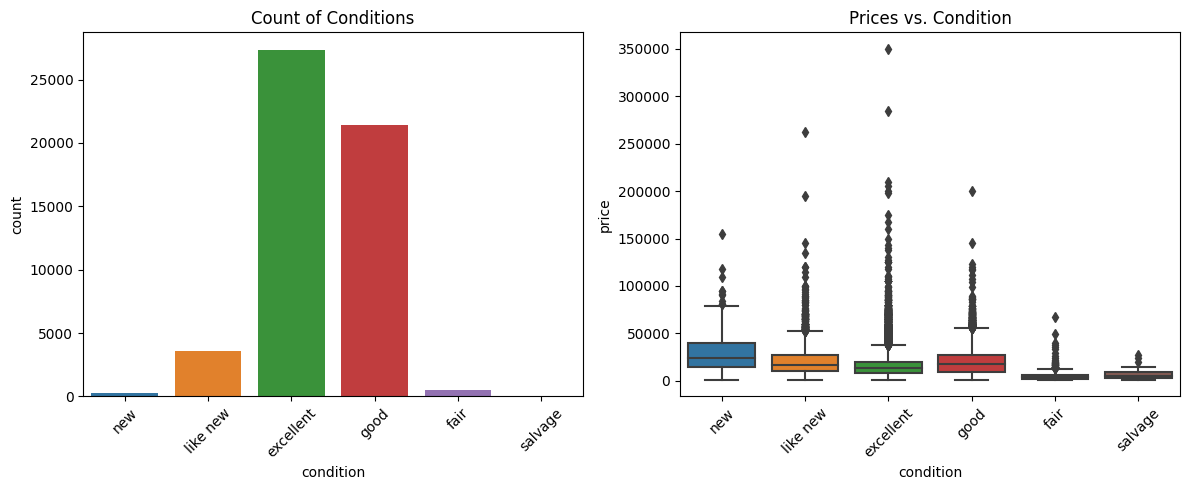

In [ ]:
condition_order = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Countplot of Condition
sns.countplot(x='condition', data=cars, order=condition_order, ax=ax[0])
ax[0].set_title('Count of Conditions')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  # Rotate x-axis labels

# Boxplot of Condition vs. Prices
sns.boxplot(data=cars, y='price', x='condition', order=condition_order, ax=ax[1])
ax[1].set_title('Prices vs. Condition')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

**Note: This was part of the cleaning process to help us visualize the data and are not part of our final visualizations**

The price vs condition graph is not giving us an intuitive answer. As one would expect, **new** cars are priced the highest on average, followed by **like new** and then **excellent**. However, the exception to this pattern is that the average for **good** cars is higher than **excellent** and **like new**, but there are also a lot of outliers for **excellent**. There are a few possible observations and explanations: \

1. There are very few **new** cars, so it's possible that the average is skewed.

2. There ae a lot of null values.

3. People who listed their cars as **good** may have been more likely to be honest and fair in stating the condition of their cars.

We can map this column into integers based on the "newness" of the car and then drop the original condition column. The mapping is as follows:

1. salvage
2. fair
3. good
4. excellent
5. like new
6. new


In [ ]:
cars['condition_new'] = cars['condition'].map({'new': 1, 'like new': 2, 'excellent' : 3, 'good' : 4, "fair" : 5, "salvage" : 6})

In [ ]:
cars = cars.drop(columns = ['condition'])

### Imputing Data

#### Imputations: Manufacturer

We can populate the missing values for **manufacturer** with the most frequently occurring data.



In [ ]:
# Changing manufacturer column type to category
cars['manufacturer'] = cars['manufacturer'].astype('category')

# Filling in manufacturer column with the most common value
cars['manufacturer'] = cars['manufacturer'].fillna(cars['manufacturer'].value_counts().index[0])


####Imputation: Model

For each Manufacturer, we can fill in the most frequently occuring models and impute those into the missing values for the **model** column

In [ ]:
cars['model'].replace('[^a-zA-Z0-9]', '') # replacing extra/non alphanumeric characters in the model names

116       nx 200t sport utility 4d
187                        mustang
190                         sentra
199                     fj cruiser
200                         altima
                    ...           
426875           maxima s sedan 4d
426876    s60 t5 momentum sedan 4d
426877            xt4 sport suv 4d
426878             es 350 sedan 4d
426879    4 series 430i gran coupe
Name: model, Length: 97235, dtype: object

In [ ]:
def fill_missing(group):
    if group['model'].notnull().any():
        most_frequent = group['model'].mode().iloc[0]
        group['model'].fillna(most_frequent, inplace=True)
    return group

# Group by 'manufacturer' and apply the fill_missing function
cars = cars.groupby('manufacturer').apply(fill_missing)

<ipython-input-42-c2f71277d697>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cars = cars.groupby('manufacturer').apply(fill_missing)


This confirms that this manufacturer does not have any non-null models to impute the most frequently occurring models to, so we can map them to 'Unspecified' instead

In [ ]:
values = {'model' : 'unspecified'}
cars.fillna(value=values, inplace=True)

#### Imputation: Paint Color

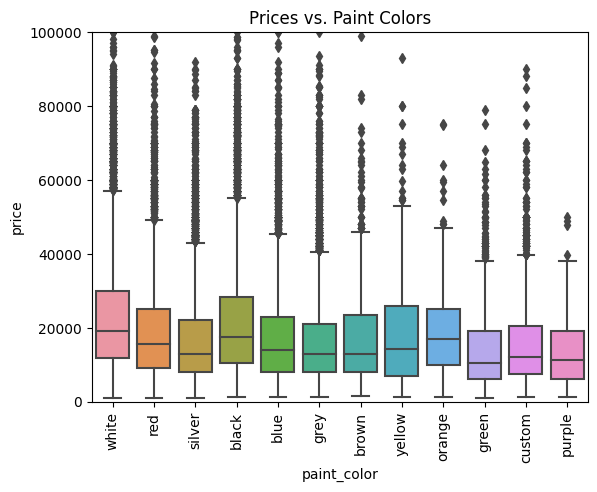

In [ ]:
sns.boxplot(data = cars, y = 'price', x = 'paint_color').set(title= "Prices vs. Paint Colors")
plt.xticks(rotation = 90)
plt.ylim(0,100000)
plt.ticklabel_format(style='plain', axis='y')

**Note: These were part of the cleaning process to help us visualize the data and are not part of our final visualizations**

We can see that **paint_color** has a lot of empty values, but we found that certain paint colors often correlate with price, with **Black and White** usually being priced higher than unique colours.

Hence, we will impute the colour as black or white for more expensive cars. And other colours for less expensive cars.


In [ ]:
def impute_color(row):
    if pd.notna(row['paint_color']):
        return row['paint_color']
    elif row['price'] >= 25000:
        return np.random.choice(['black', 'white'])
    else:
        return np.random.choice(['red', 'blue', 'silver', 'grey','brown','orange','custom','purple','green', 'yellow'])

cars['paint_color'] = cars.apply(impute_color, axis=1)

####Imputation: Cylinders

We can explore **cylinders** more to understand the kinds of values in that column. Because they are numbers, we can strip the word cylinders and just keep the numbers, and then convert them to int.

In [ ]:
cars['cylinders'].head(200)

116             NaN
187     6 cylinders
190     4 cylinders
199             NaN
200             NaN
           ...     
1459    6 cylinders
1460    6 cylinders
1466    4 cylinders
1470    4 cylinders
1471    4 cylinders
Name: cylinders, Length: 200, dtype: object

In [ ]:
cars['cylinders'] = cars['cylinders'].str.split(' ').str[0]
cars['cylinders'].head(200)

116     NaN
187       6
190       4
199     NaN
200     NaN
       ... 
1459      6
1460      6
1466      4
1470      4
1471      4
Name: cylinders, Length: 200, dtype: object

Before we can convert this into an int, we need to impute the missing values. We can see the types of cylinder values that are available.

In [ ]:
cars['cylinders'].unique()

array([nan, '6', '4', '8', '5', '10', '12', '3', 'other'], dtype=object)

Generally, cars have either 4, 6 or 8 cylinders (based on https://www.arnoldclark.com/newsroom/2331-everything-you-need-to-know-about-engine-cylinders#:~:text=The%20number%20of%20cylinders%20in,valve%20and%20an%20outlet%20valve.)



In [ ]:
cars['cylinders'].fillna(np.random.choice([4, 6, 8]),inplace=True)

In [ ]:
cars.loc[cars["cylinders"] == "other", "cylinders"] = np.random.choice([4,6,8])

In [ ]:
cars['cylinders'] = cars['cylinders'].astype(int)

#### Function for Random Sampling and Imputating Transmission, Size, Type, Drive, Fuel & Condition

The rest of the missing values belong to columns that we want to convert to categories. We will fill in the missing values using random sampling. We defined a **function** to convert the specified columns category columns and then fill in null values using random sampling.

Columns imputed using random sampling -
**1.Transmission**
**2. Size**
**3. Type**
**4. Drive**
**5. Fuel**
**6: Condition**

All of these columns contain only a few distinct values and are hence a good fit for being converted into categorical data.

We used random sampling rather than median to get less biased results.

In [ ]:
# creating function for random sampling as imputation method
def do_random_sampling(stri):
    # converting type to category
    cars[stri] = cars[stri].astype('category')

    #finding out the indices for where the values are missing
    missing_indices = cars[cars[stri].isnull()].index

    # finding unique categories via finding values that are not missing
    unique_categories = cars[stri].dropna().unique()

    #fill in missing values using random sampling
    cars.loc[missing_indices, stri] = np.random.choice(unique_categories, len(missing_indices))
    print("Missing Now for " + stri + ": " + str(cars[stri].isnull().sum()))

In [ ]:
# Random sampling for transmission
do_random_sampling('transmission')

# Random sampling for size
do_random_sampling('size')

# Random sampling for type
do_random_sampling('type')

# Random sampling for drive
do_random_sampling('drive')

# Random sampling for fuel
do_random_sampling('fuel')

# Random sampling for Condition
do_random_sampling('condition_new')

Missing Now for transmission: 0
Missing Now for size: 0
Missing Now for type: 0
Missing Now for drive: 0
Missing Now for fuel: 0
Missing Now for condition_new: 0


### Checking for duplicates

In [ ]:
cars.drop_duplicates(subset=['id'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97235 entries, 116 to 426879
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  97235 non-null  int64   
 1   region              97235 non-null  object  
 2   price               97235 non-null  int64   
 3   manufacturing_year  97235 non-null  int64   
 4   manufacturer        97235 non-null  category
 5   model               97235 non-null  object  
 6   cylinders           97235 non-null  int64   
 7   fuel                97235 non-null  category
 8   odometer            97235 non-null  float64 
 9   transmission        97235 non-null  category
 10  drive               97235 non-null  category
 11  size                97235 non-null  category
 12  type                97235 non-null  category
 13  paint_color         97235 non-null  object  
 14  state               97235 non-null  object  
 15  lat                 96446 non-nul

### Lat and Long
Considering that this is a Used Cars Dataset within the United States, we needed to only consider listings that were posted in the USA. We can find this out by finding out the US Coordinates for latitude and longitude, and dropping rows that are not within the defined region.

For this, we will first drop all NAs from latitude and longitude, since those can't be logically imputed.

In [ ]:
cars = cars.dropna(subset = ['lat','long'])

### Grouping Manufacturers by Manufacturer Country

In [ ]:
# Create a dictionary to map manufacturers to countries
manufacturer_to_country = {
    'toyota': 'Japan',
    'lexus': 'Japan',
    'subaru': 'Japan',
    'mitsubishi': 'Japan',
    'datsun': 'Japan',
    'nissan': 'Japan',
    'infiniti': 'Japan',
    'mazda': 'Japan',
    'honda': 'Japan',
    'acura': 'Japan',
    'audi': 'Germany',
    'volkswagen': 'Germany',
    'porsche': 'Germany',
    'mercedes-benz': 'Germany',
    'bmw': 'Germany',
    'jaguar': 'United Kingdom',
    'land rover': 'United Kingdom',
    'aston-martin': 'United Kingdom',
    'morgan': 'United Kingdom',
    'mini': 'United Kingdom',
    'alfa-romeo': 'Italy',
    'rover' : "United Kingdom",
    'fiat': 'Italy',
    'ferrari': 'Italy',
    'volvo': 'Sweden',
    'kia': 'South Korea',
    'hyundai': 'South Korea',
    'gmc': 'United States',
    'chevrolet': 'United States',
    'ford': 'United States',
    'jeep': 'United States',
    'ram': 'United States',
    'cadillac': 'United States',
    'dodge': 'United States',
    'buick': 'United States',
    'chrysler': 'United States',
    'lincoln': 'United States',
    'pontiac': 'United States',
    'saturn': 'United States',
    'mercury': 'United States',
    'harley-davidson': 'United States',
    'tesla': 'United States',
}
# Map manufacturers to countries and create a new 'country' column
cars['manufacture_country'] = cars['manufacturer'].map(manufacturer_to_country)

<ipython-input-56-b33215b4a099>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['manufacture_country'] = cars['manufacturer'].map(manufacturer_to_country)


Creating different price groups based on the price ranges.

In [ ]:
def price_group(price):
    if price <= 10000:
      return "0-10,000"
    if price > 10000 and price <= 20000:
      return "10,000-20,000"
    if price > 20000 and price <= 30000:
      return "20,000-30,000"
    if price > 30000 and price <= 40000:
      return "30,000-40,000"
    if price > 40000 and price <= 50000:
      return "40,000-50,000"
    if price > 50000 and price <= 100000:
      return "50,000-100,000"
    elif price > 100000:
      return "Over 100,000"

cars['price_group'] = cars['price'].apply(lambda x : price_group(x))


### Saving our final dataset to a CSV so that we have a record of it

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96446 entries, 116 to 426879
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   96446 non-null  int64   
 1   region               96446 non-null  object  
 2   price                96446 non-null  int64   
 3   manufacturing_year   96446 non-null  int64   
 4   manufacturer         96446 non-null  category
 5   model                96446 non-null  object  
 6   cylinders            96446 non-null  int64   
 7   fuel                 96446 non-null  category
 8   odometer             96446 non-null  float64 
 9   transmission         96446 non-null  category
 10  drive                96446 non-null  category
 11  size                 96446 non-null  category
 12  type                 96446 non-null  category
 13  paint_color          96446 non-null  object  
 14  state                96446 non-null  object  
 15  lat             

In [ ]:
cars.to_csv('gdrive/MyDrive/ba780-b05-fall23/cleaned_cars_final_v2.csv')

## Further Visualizations


In this section, we will gain a more in-depth understanding of the distributions of the different car attributes, and visualize how they correlate with each other and influence the price of the car.

In [ ]:
sns.set_style('whitegrid')

### Correlation Matrix



<ipython-input-118-9feb005b94fd>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



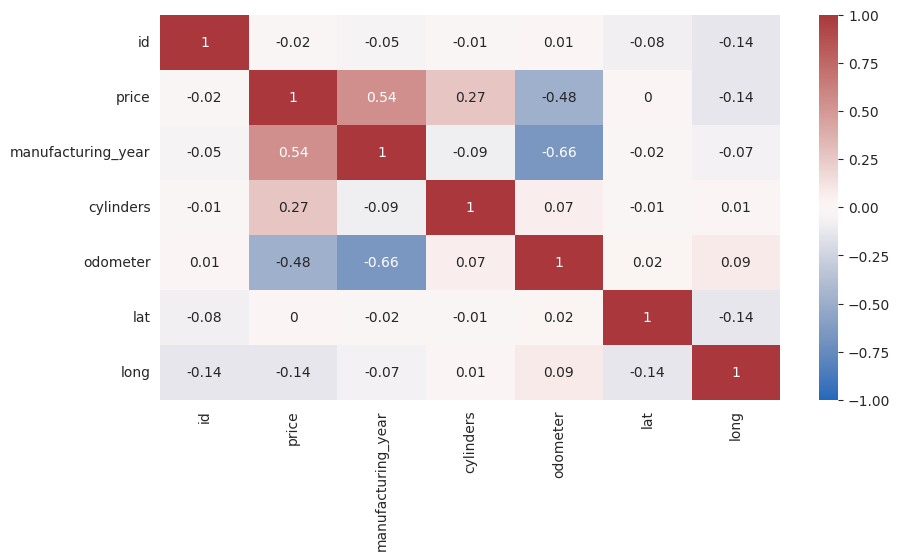

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(cars.corr().round(2), annot=True, vmin = -1, vmax= 1, cmap = 'vlag');

The correlation matrix speaks to us about some important relationships between numerical variables.

The price has a medium strength relationship with manufacturing year (+ve), number of cylinders (+ve) and odometer (-ve).

There is also a -ve relationship with longitude which indicates listings are cheaper in the south.

The manufacturing year has a medium-strong relationship with odometer. This makes intuitive sense, as the older the car is, the more likelihood of it having been driven a greater distance.

### Price Distributions and Distribution Across Manufacturers

To start, we wanted to visualize how the car prices were distributed across our cleaned dataset, to gain a more in-depth understanding of the kinds of prices people were listing their cars with on Criaglist. Were there a greater number of higher priced cars, or were the prices evenly distributed?

The mean of the car prices is: 19528.455539887607
The median of the car prices is: 15990.0


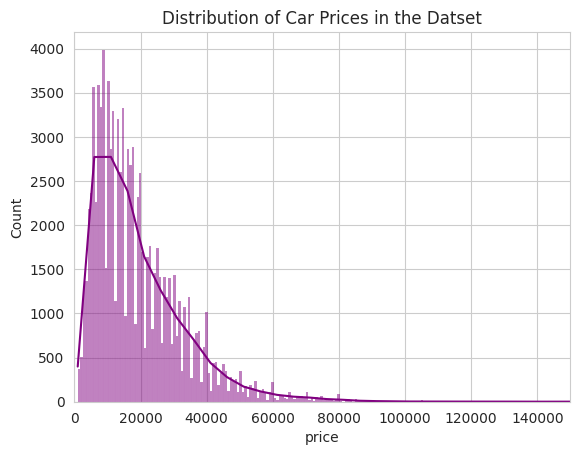

In [ ]:
sns.set_style('whitegrid')
sns.histplot(data=cars, x='price', kde=True, color = 'purple')
plt.xlim(0,150000)
plt.title("Distribution of Car Prices in the Datset")
print("The mean of the car prices is:", cars['price'].mean())
print("The median of the car prices is:", cars['price'].median())

We can see that the distribution of car prices are actually skewed to the right, with very few cars being priced greater than USD 40,000. The mean and median prices of the cars were also both under USD 20,000. There could be several explanations for this:

1. Considering this is a Used Cars dataset, we can assume that the cars posted have definitely been used to some extent. Usage involves some wear and tear and accumulation of miles, which causes the value of the car to drop.
2. New cars generally tend to lose their value rapidly within the first few years of purchase. So it's quite possible that even the more expensive cars had to be priced lower because their market value had decreased.
3. Our cleaned dataset contains cars that were maufactured in the year 2000 and onwards. More older cars, especially ones with high mileage, could contribute to the right-skewed distribution.
4. Seller's might have different motivations when pricing their cars. A seller wanting to sell their car and make money quickly might have been more motivated to price their car lower in comparision with a seller that might have been okay with their cars taking more time to sell, if it meant getting a higher price. If we consider that the listings are from 2021, when the US was still recovering from the recession caused by COVID-19, we can perhaps understand why people might have wanted to make money quickly.
5. Certain models of cars belonging to certain manufacturers might have been more in demand, causing the prices to have been raised.

If we consider the dataset as a whole, it is apparent that there were more cars priced lower, due to a combination of economic factors, seller behaviour, supply and demand rules and the specific attributes of the car, but we can explore this more in depth by also examining the average car prices by manufacturer.

(**Reference:** https://www.lendingtree.com/auto/how-much-do-new-cars-depreciate/#:~:text=Cars%20lose%20the%20most%20value,year%20after%20the%20first%20year.)


<ipython-input-120-ac285eebd033>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-120-ac285eebd033>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



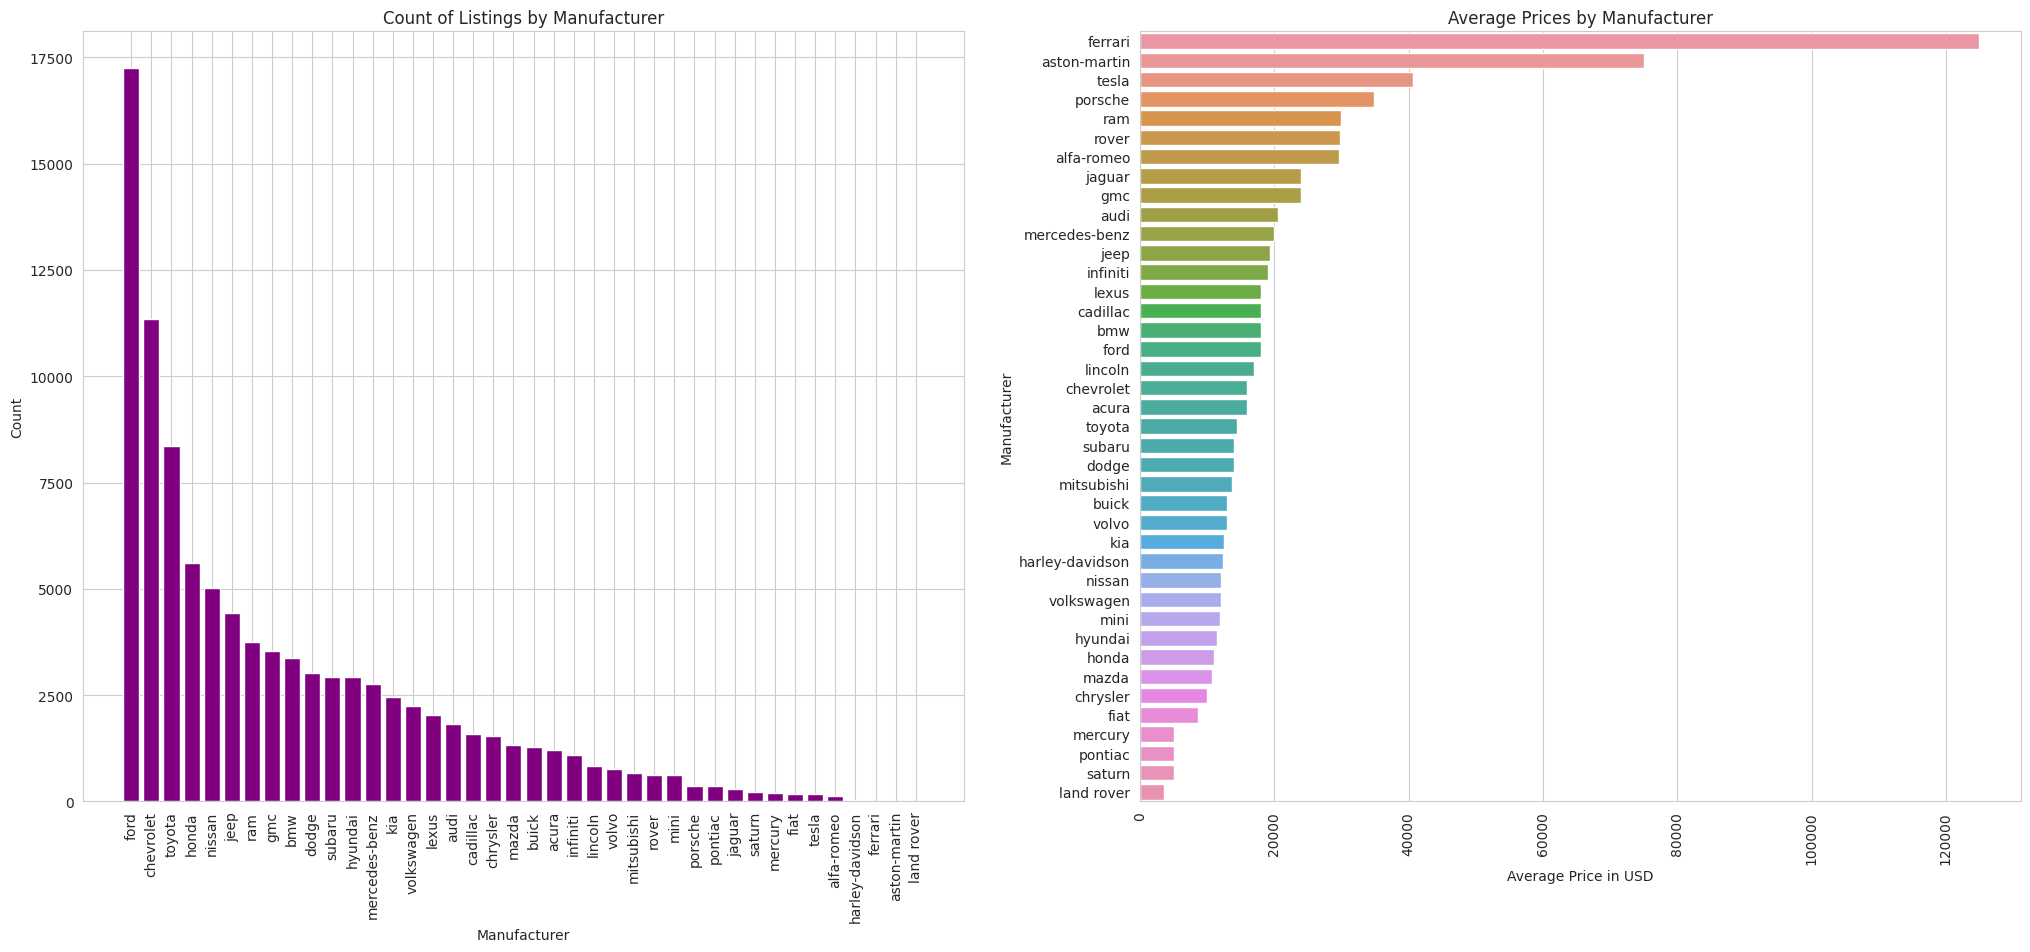

In [ ]:
# Count of Listings by Manufacturer
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

manufacturer_counts = cars['manufacturer'].value_counts()
manufacturer_counts = manufacturer_counts.sort_values(ascending=False)
ax[0].bar(manufacturer_counts.index, manufacturer_counts, color='purple')
ax[0].set_title('Count of Listings by Manufacturer')
ax[0].set_xlabel('Manufacturer')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(manufacturer_counts.index, rotation=90)

# Average Prices by Manufacturer
manufacturer_prices = cars.groupby('manufacturer')['price'].median().reset_index()
manufacturer_prices = manufacturer_prices.sort_values(by='price', ascending=False)
sns.barplot(data=manufacturer_prices, x='price', y='manufacturer', order=manufacturer_prices['manufacturer'], ax=ax[1])
ax[1].set_xlabel('Average Price in USD')
ax[1].set_ylabel('Manufacturer')
ax[1].set_title('Average Prices by Manufacturer')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

#plt.tight_layout()
plt.show()

We grouped the ``manufacturer`` and ``price`` columns and sorted the values in descending order.

To get an understanding of the distribution of car prices across manufacturers, we felt that it could not be examined in isolation, and that we also had to take the number of listings into account. A single listing for a car manufacturer that was very expensive would skew the average price for that manufacturer, whereas a manufacturer with a greater number of listings might have a more spread out distribution in comparison.

We can see above that the 3 manufacturers with the highest prices on average are `Ferrari`, `Aston Martin` and `Tesla`, which makes sense logically, as all 3 are luxury car brands, and Tesla specifically sells electric cars, which tend to be more expensive.

However, we can see from the first graph that each of `Ferrari`, `Aston Martin` and `Tesla`have very few listings included in the dataset. The fewer but higher prices definitely impacted the average prices and explains why the distribution is the way it is, e.g., Ferrari's average price being over USD 120,000.

In comparison, `Ford` has the highest number of cars in the dataset - around 17,000. This checks out logically given that this is a dataset for US cars - some Ford cars are even known as "America's cars!" We can see that Ford's average price is in the middle of the distribution, and is just under USD 20,000, which is also what the mean and median prices of our dataset are. This could also be attributed to the fact that Ford makes many different types of vehicles, from more expensive types like SUVs, to cheaper ones like mini-vans.

We explored this further by doing a comparison of the different vehicles manufactured by Ford and by Tesla.


**References:**
1. https://cars.usnews.com/cars-trucks/advice/best-luxury-car-brands
2. https://gunthertoodys.com/the-ford-mustang-americas-car/


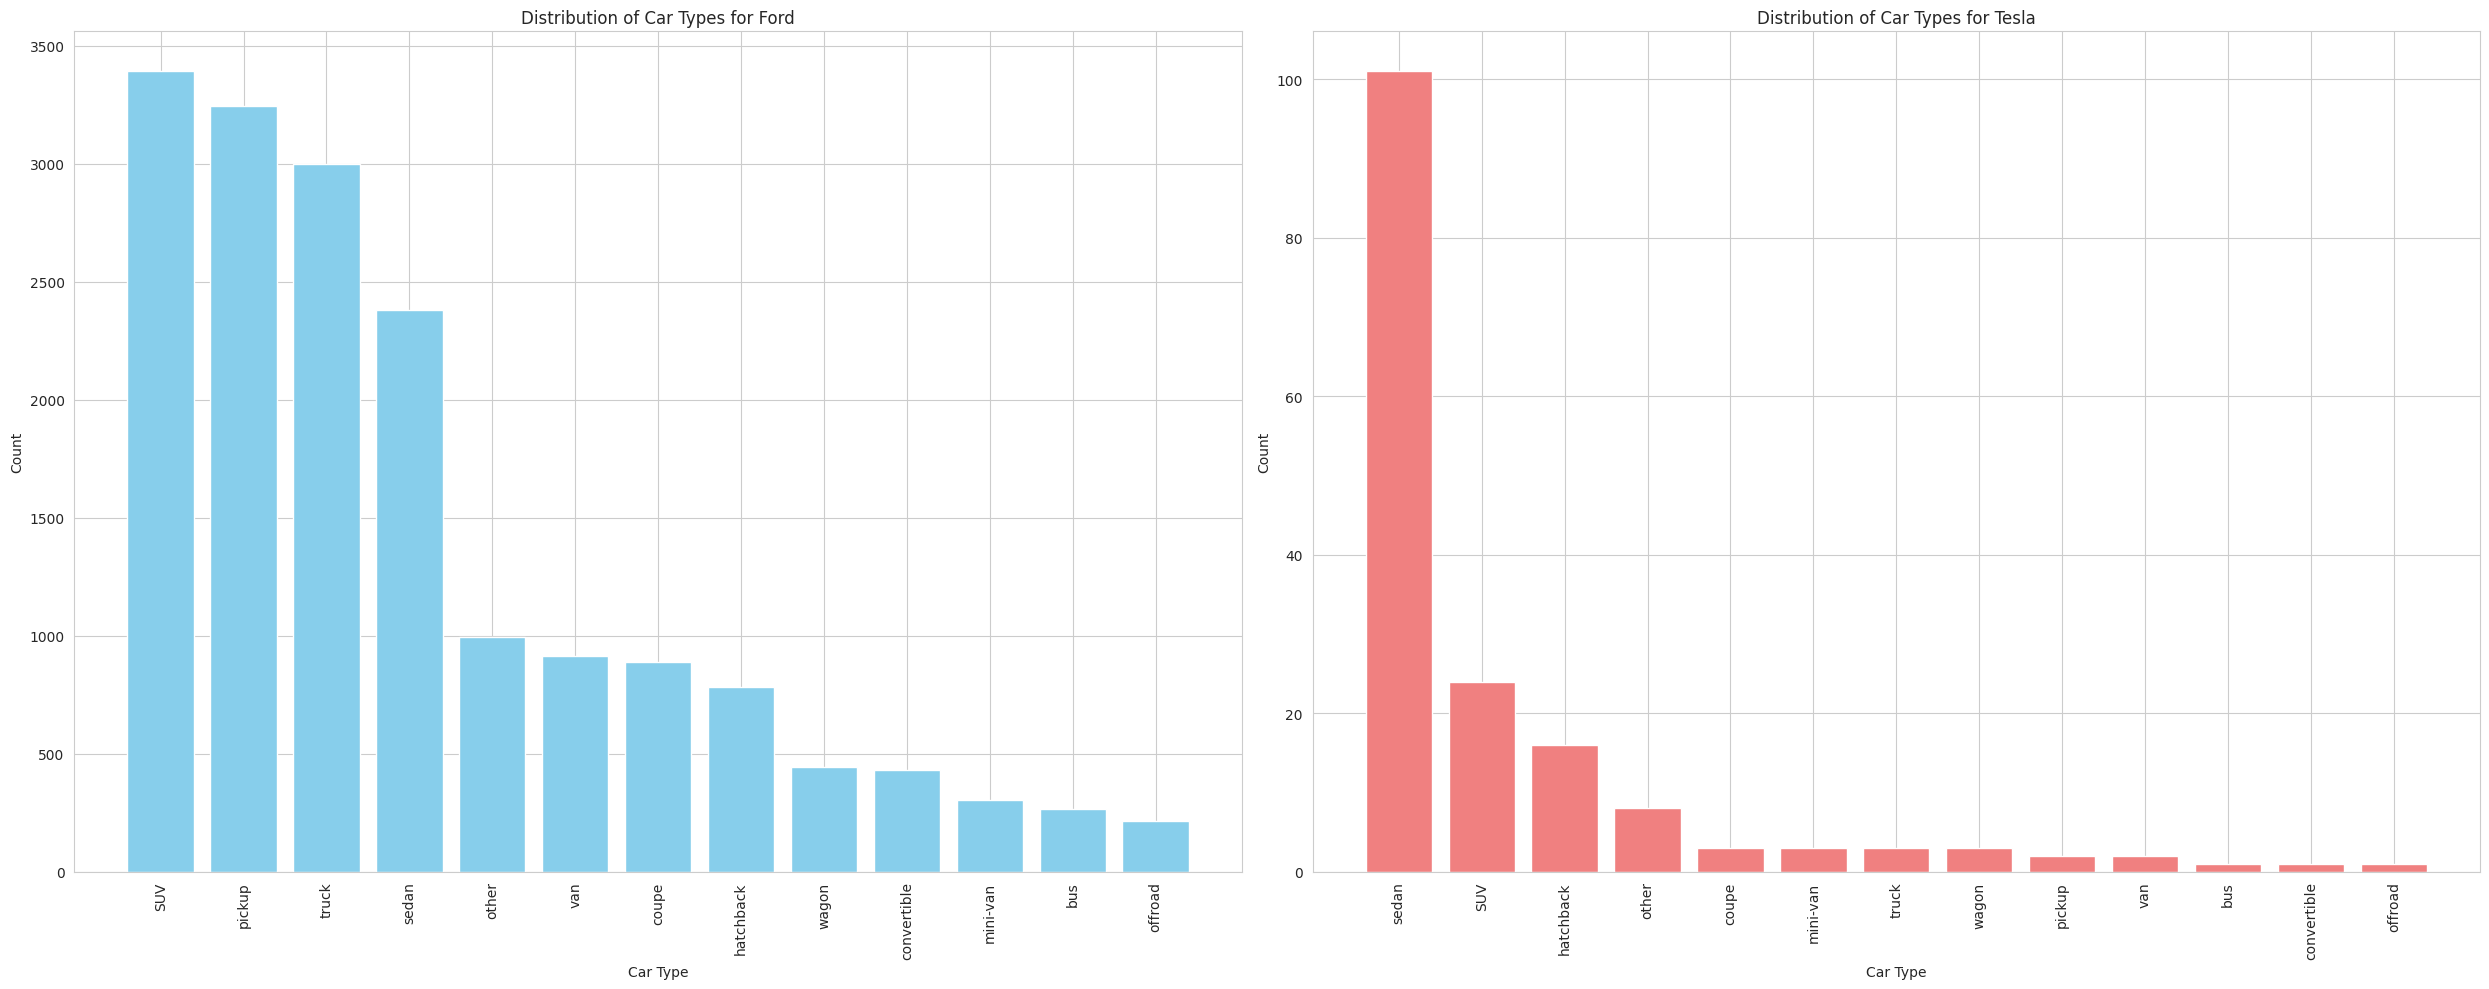

In [ ]:
ford_cars = cars[cars['manufacturer'] == 'ford']
tesla_cars = cars[cars['manufacturer'] == 'tesla']

ford_type_count = ford_cars['type'].value_counts()
tesla_type_count = tesla_cars['type'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

# Distribution of Car Types for Ford
car_type_count_ford = ford_cars['type'].value_counts()
ax[0].bar(car_type_count_ford.index, car_type_count_ford, color='skyblue')
ax[0].set_title('Distribution of Car Types for Ford')
ax[0].set_xlabel('Car Type')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Distribution of Car Types for Tesla
car_type_count_tesla = tesla_cars['type'].value_counts()
ax[1].bar(car_type_count_tesla.index, car_type_count_tesla, color='lightcoral')
ax[1].set_title('Distribution of Car Types for Tesla')
ax[1].set_xlabel('Car Type')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

From this, it is apparent that the quantity of different types of cars manufacturd by Ford is significantly higher than those manufactured by Tesla, for e.g., Ford had at around 3200 listings for SUV alone, and a siginificant number of listings for the subsequent types. In comparison, Tesla had fewer listings across differet types - under 100 for sedans and around 20 or fewer across the subsequent types.  

### Price Trends Based on Manufacturers and their Countries of Origin

We wanted to continue to explore the impact on the ranges of car prices, based on their manufacturers. We wanted to zoom in on the manufacturing country of origin, to assess if car prices differed for manufacturers, based on their country of origin. Within the US, did US-manufactured cars stand out compared to their international competitiors?

The below bar chart shows us the price range of cars sold by different manufacturers. Using the different colors to point at each price group, we can see that cars sold between a price range of USD 0−10,000 and  USD 10,000−20,000 are plotted as light green and blue respectively.

Most cars sold on Craigslist fall under these ranges. Using the color gradient assigned, we can point out the manufacturers whose cars sell at higher ranges i.e., USD 50,000−100,000 and Over $100,000+. This tells us that the absolute resale value of these cars is close to, within, or above the median salary of the United States - USD 57, 200 (1).

**References:**
1. https://www.bls.gov/news.release/wkyeng.nr0.htm

<Figure size 2000x1200 with 0 Axes>

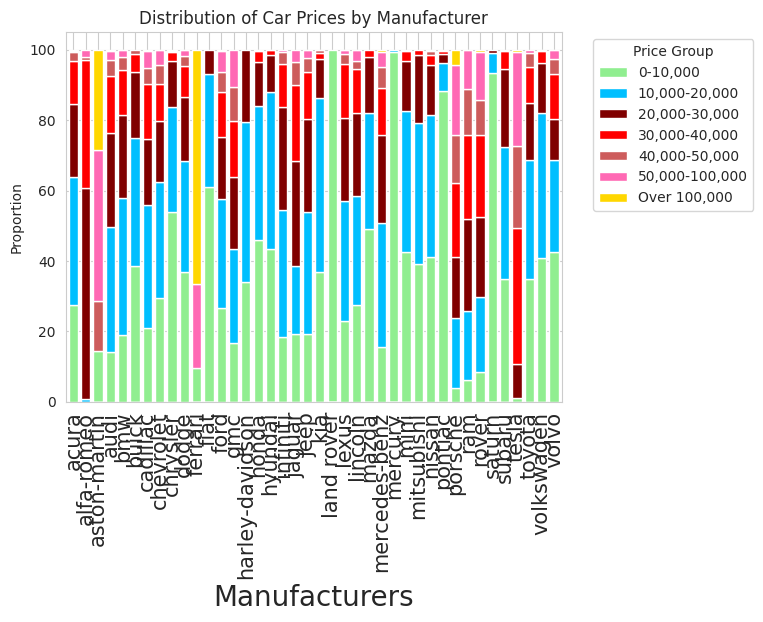

In [ ]:
price_category = cars.groupby(['manufacturer','price_group'],as_index=False)['price_group'].value_counts()
price_category
price_category[['manufacturer','price_group','count']]
price_category
price_category['total_count'] = price_category.groupby('manufacturer')['count'].transform('sum')
price_category['proportion'] = (price_category['count'] / price_category['total_count'])*100
price_category = pd.DataFrame(price_category)

# Pivot the data for stacked bar chart
bar_width = 0.75
pricecategory_df = price_category.pivot(index='price_group', columns='manufacturer', values='proportion')

fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor('lightblue')
colors=['lightgreen','deepskyblue','maroon','red','indianred','hotpink','gold']
pricecategory_df.T.plot(kind='bar', stacked=True, color=colors, width=bar_width)
plt.title('Distribution of Car Prices by Manufacturer')
plt.xlabel('Manufacturers', fontsize=20)
plt.ylabel('Proportion')
plt.legend(title='Price Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=15)
plt.show()


Several observations stand out:

1. All of mercury's cars are within the USD 0-10,000 range.
2. Pontiac is an American car brand and most of its listings are within the USD 0-10,000 range as well.
3. Other than Land-Rover, whose manufacturing country of origin is the United Kingdom, the brands with the highest proportion of cheapest cars are American in origin.

The percentage of each manufacturer whose car prices are majorly found in the median US salary ranges are as follows:

1. Aston-Martin: 71.42%
2. Ferrari: 90.46%

Tesla's and Porsche's distribution of cars in these ranges is also quite significant -

Tesla - 27.37%

Porsche 24.24%

Despite cars from these brands being second-hand, their listing prices were still not affordable for the average American.

In [ ]:
pricecategory_df[['aston-martin','ferrari','tesla','porsche']]

manufacturer    aston-martin  ferrari    tesla  porsche
price_group                                            
0-10,000            14.28571  9.52381  1.19048  3.81471
10,000-20,000        0.00000  0.00000  0.00000 19.89101
20,000-30,000        0.00000  0.00000  9.52381 17.43869
30,000-40,000        0.00000  0.00000 38.69048 20.98093
40,000-50,000       14.28571  0.00000 23.21429 13.62398
50,000-100,000      42.85714 23.80952 26.78571 19.89101
Over 100,000        28.57143 66.66667  0.59524  4.35967

We can see below that the countries whose manufacturers are being re-sold at the most affordable rate - with affordability defined to be a car that costs less than $30000(1) are manufactured by Japanese and South Korean companies.

Japan: 90.63%

South Korea: 97.91%

These two countries together make up 38% of the cars in this range, despite making up 34% of the cars in the overall dataset.

**References:**
1. https://www.cnbc.com/2022/07/21/consumers-paying-average-10000-above-normal-prices-for-used-cars.html

<Figure size 2000x1200 with 0 Axes>

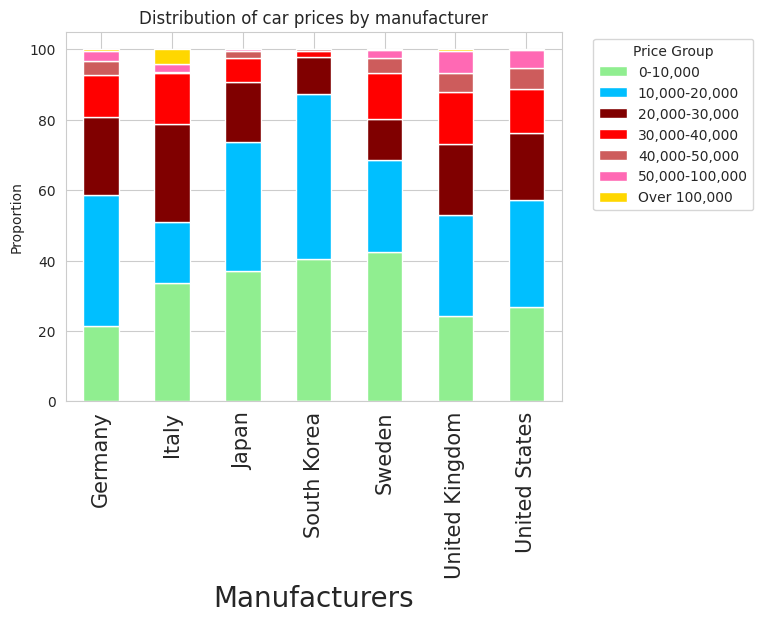

In [ ]:
country = cars.groupby(['manufacture_country','price_group'],as_index=False)['price_group'].value_counts()
country
country[['manufacture_country','price_group','count']]
country
country['total_count'] = country.groupby('manufacture_country')['count'].transform('sum')
country['proportion'] = (country['count'] / country['total_count'])*100
country = pd.DataFrame(country)

# Pivot the data for stacked bar chart
bar_width = 0.5
country_df = country.pivot(index='price_group', columns='manufacture_country', values='proportion')
fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor('lightblue')
colors=['lightgreen','deepskyblue','maroon','red','indianred','hotpink','gold']
country_df.T.plot(kind='bar', stacked=True, color=colors, width=bar_width)
plt.title('Distribution of car prices by manufacturer')
plt.xlabel('Manufacturers', fontsize=20)
plt.ylabel('Proportion')
plt.legend(title='Price Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=15)
plt.show()

In [ ]:
country_df

manufacture_country  Germany    Italy    Japan  South Korea   Sweden  \
price_group                                                            
0-10,000            21.38603 33.52770 37.09620     40.30517 42.56145   
10,000-20,000       37.17500 17.49271 36.53655     46.92966 26.13195   
20,000-30,000       22.30311 27.69679 17.01615     10.69967 11.51358   
30,000-40,000       11.76137 14.57726  6.98144      1.61891 12.93661   
40,000-50,000        4.07488  0.29155  1.85959      0.42799  4.26908   
50,000-100,000       2.90252  2.33236  0.48526      0.01861  2.45796   
Over 100,000         0.39709  4.08163  0.02479          NaN  0.12937   

manufacture_country  United Kingdom  United States  
price_group                                         
0-10,000                   24.30868       26.87329  
10,000-20,000              28.55305       30.36982  
20,000-30,000              20.38585       18.98895  
30,000-40,000              14.59807       12.63309  
40,000-50,000               5.40193        5.71665  
50,000-100,000              6.36656        5.27706  
Over 100,000                0.38585        0.14115

Zooming into Japan and South Korea to support our explanation.

In [ ]:
filtered_country = country[(country['manufacture_country'] == 'Japan') | (country['manufacture_country'] == 'South Korea')]
filtered_country

manufacture_country     price_group  count  total_count  proportion
14               Japan        0-10,000  10473        28232    37.09620
15               Japan   10,000-20,000  10315        28232    36.53655
16               Japan   20,000-30,000   4804        28232    17.01615
17               Japan   30,000-40,000   1971        28232     6.98144
18               Japan   40,000-50,000    525        28232     1.85959
19               Japan  50,000-100,000    137        28232     0.48526
20               Japan    Over 100,000      7        28232     0.02479
21         South Korea        0-10,000   2166         5374    40.30517
22         South Korea   10,000-20,000   2522         5374    46.92966
23         South Korea   20,000-30,000    575         5374    10.69967
24         South Korea   30,000-40,000     87         5374     1.61891
25         South Korea   40,000-50,000     23         5374     0.42799
26         South Korea  50,000-100,000      1         5374     0.01861

### Prices By States
We wanted to see if there was any correlation between the car prices and the states in which they were listed. Did certain states have excessively high prices, especially when compared to those of other states? What were the proportion of price ranges of cars sold in states with the highest average prices?

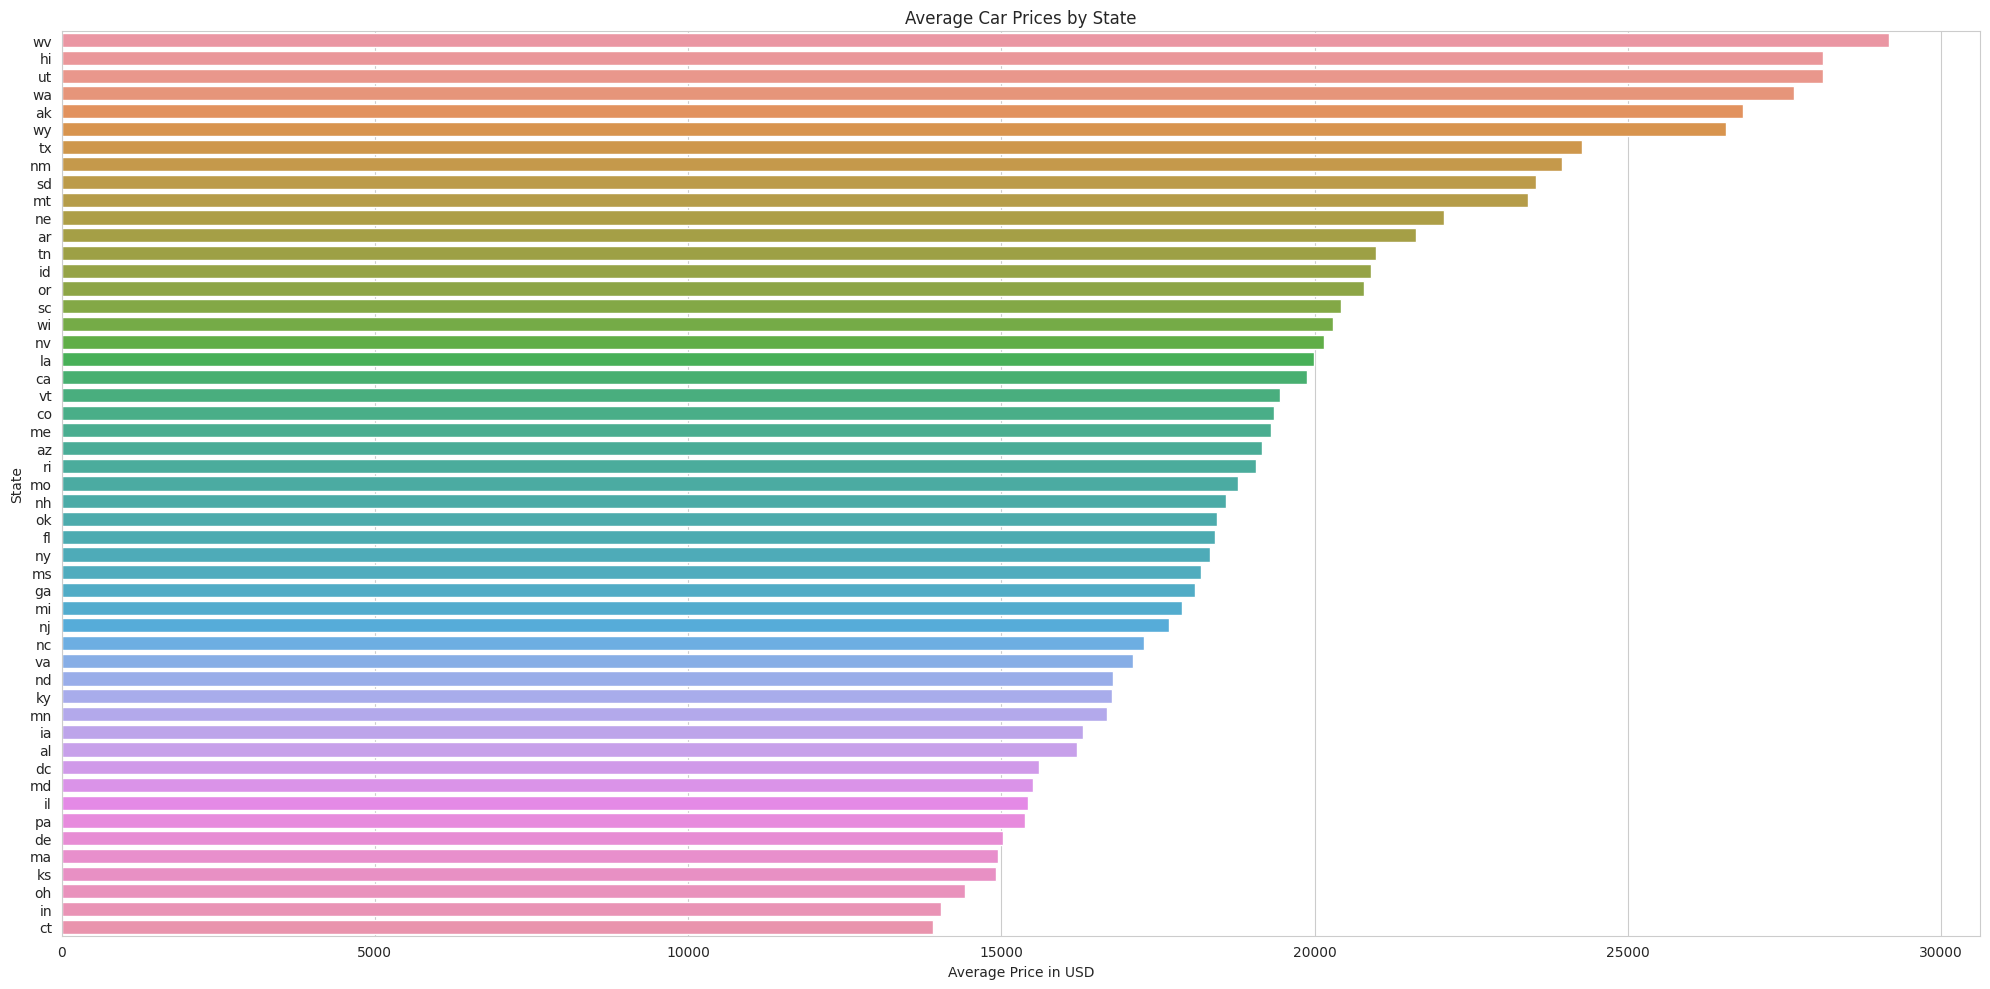

In [ ]:
# Average Car by Price

# Group by 'state' and calculate the average price
state_avg_price = cars.groupby('state')['price'].mean().reset_index()

# Sort the data by average price in descending order (optional)
state_avg_price = state_avg_price.sort_values(by='price', ascending=False)

# Create the bar chart using Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x= 'price', y='state', data=state_avg_price, order=state_avg_price['state'])
plt.xlabel('Average Price in USD')
plt.ylabel('State')
plt.title('Average Car Prices by State')
plt.tight_layout()

plt.show()

We wanted to find the Average Prices across States in the US. We have done this by grouping the columns ``state`` and ``price`` and sorting the values in descending order. The Bar Chart shows the Average Price by Manufacturer.

**West Virginia** and **Hawaii** appear to have the highest average car prices, while **Indiana** and **Connecticut** appear to have the lowest. However, it is possible that this could be impacted by the number of car listings in each state as well.

We wanted to see whether Craigslist prices for used cars were reflective of national trends for used cars. According to a survey by ISeeCars.com, average car prices were actually highest in Wyoming and Alaska. Both of these states do lie in the Top 6 States with Highest Prices according to our dataset.

Alaska and Hawaii are not part of the contigious 48 states of the USA, so it's possible that the higher average car prices from those states are also higher because of their reliance on imported goods and their isolation from the road network of mainland USA.

The lowest average prices according to the survey were from **Vermont** and **New Hampshire**, but it must also be noted that their analysis is from 2023, while ours is from listings from 2021.

This can also tell us that Craigslist listings alone are not necessarily the closest reflection of national trends when it comes to used car prices.

**References:**
1. https://www.iseecars.com/used-car-prices-by-state-study


Based on the trends above, we wanted to see the proportions of price groups listed for each states.

We plotted the price ranges of the cars sold in the fifty states + DC in the below graph. Using the state dictionary(1) which is consistent with the short forms used for the states in this dataset, we can point out the states with a share of cars sold that were more expensive - filtered here as cars priced greater than USD 20,000.

**Note:** USD 20,000 was considered as the distribution of proportion of cars sold per state is found to be majorly within the USD 0− 20000 price range.

1. hi: Hawaii
2. ak: Alaska
3. ut: Utah
4. wa: Washington
5. wv: West Virginia
6. wy: Wyoming

**References:**
1. https://www.yourdictionary.com/articles/state-abbreviations

<Figure size 2000x1200 with 0 Axes>

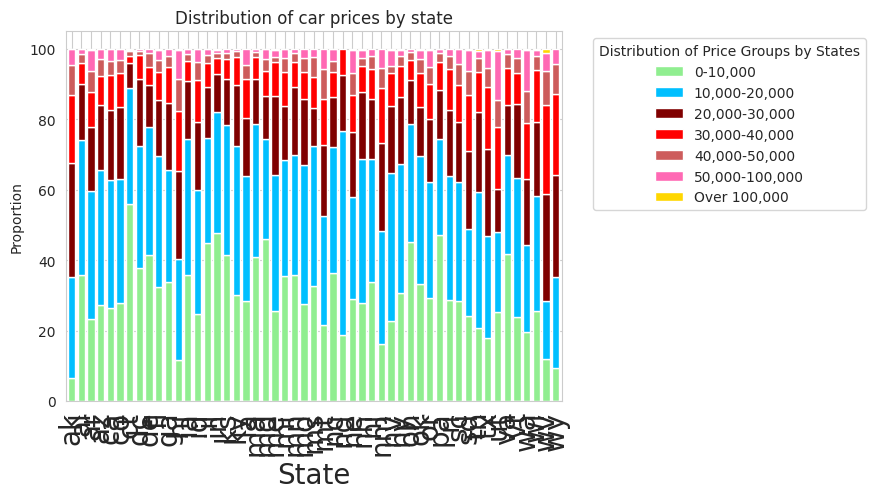

In [ ]:
state_category = cars.groupby(['state','price_group'],as_index=False)['price_group'].value_counts()
state_category
state_category = pd.DataFrame(state_category)
state_category
state_category['total_count'] = state_category.groupby('state')['count'].transform('sum')

# Calculate the proportion for each type of ifferent price groups
state_category['proportion'] = (state_category['count'] / state_category['total_count'])*100
bar_width = 0.75
statecategory_df = state_category.pivot(index='price_group', columns='state', values='proportion')

fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor('lightblue')
colors=['lightgreen','deepskyblue','maroon','red','indianred','hotpink','gold']
statecategory_df.T.plot(kind='bar', stacked=True, color=colors, width=bar_width)
plt.title('Distribution of car prices by state')
plt.xlabel('State', fontsize=20)
plt.ylabel('Proportion')
plt.legend(title='Distribution of Price Groups by States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=20)
plt.show();

It is seen that these findings are consistent with the Average Price by State graph above. It can be interpreted that the higher average price is influenced by the fact that the proportion of cars sold in these states are more expensive than in other states.

For example, the small amount of Yellow visible in the bar for wv (West Virginia) implies that it might have been the only state with the number of listings greater than USD 100,000, to be significant enough to be visible on the graph.

We can also see that ct (Connecticut) has the highest proportion of cars in the USD 0-10,000 range, which could contribute to it having the lowest average used car prices.

Connecticut also doesn't have any listings for Teslas, Ferraris or Aston Martins, which we found earlier to have the highest average prices.

### Number of Listings by State

Question: Which states' residents frequently use Craigslist to list their cars for sale? Are the frequencies in line with population data?

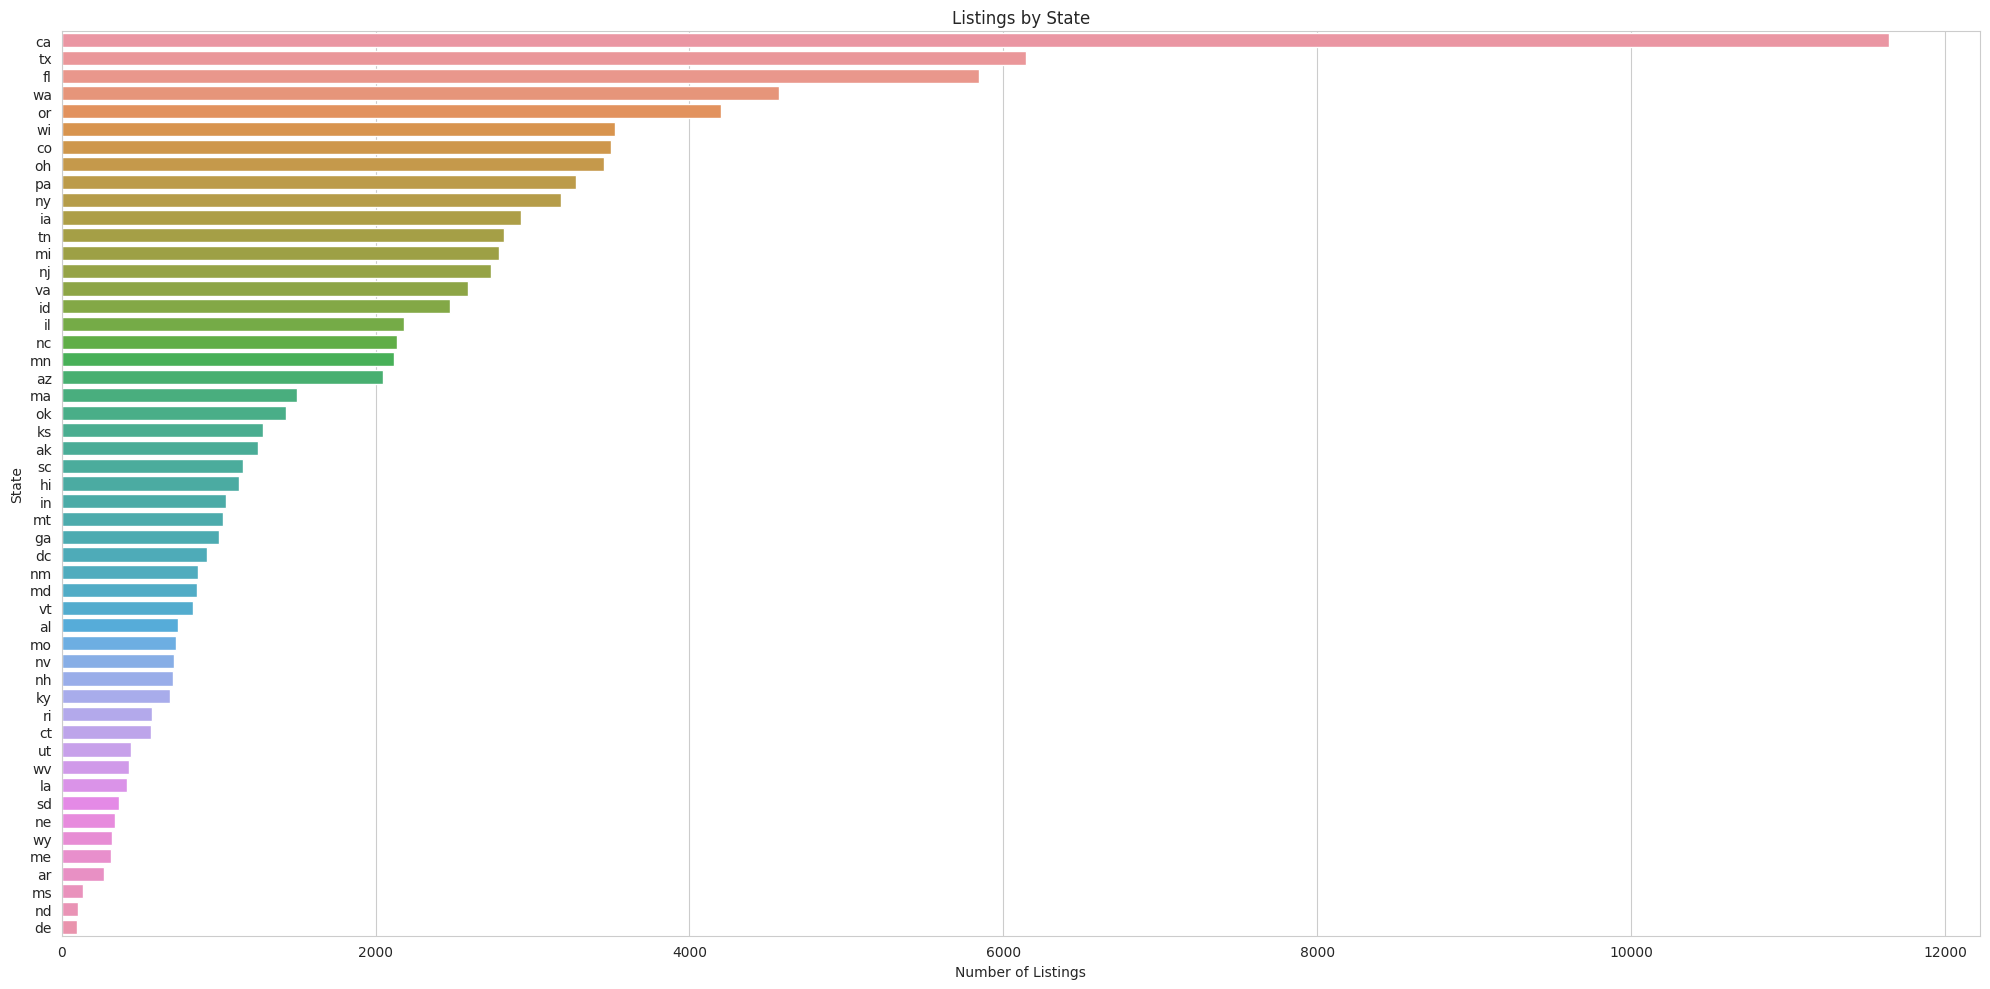

In [ ]:
# Listings by state

#counting listings by state
count_state = cars.groupby('state').size().sort_values(ascending = False)

#converting resultant series into dataframe
df_count_state = count_state.reset_index()
df_count_state.columns = ['state', 'n_listings']

#plotting a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(data = df_count_state, x = 'n_listings', y = 'state')
plt.title('Listings by State')
plt.xlabel('Number of Listings')
plt.ylabel('State')
plt.tight_layout()

Counting listings by State-Number of listings across States in the US.

The listings is not consistent with the population list by state in the US.

We can see below that the most listings are in California(ca) followed by Florida(fl). This stood out to us because this does not follow the population distribution by state in the US.

This is consistent throughout the barchart. Pennsylvania(pa) is the 5th most populated state in the country, but has the 9th most listings in the chart below.

We can also see that **West Virgina (wv)** has some of the lowest number of car listings, which could explain the graph above, as fewer but pricier listings could have skewed the average car price.



US Population Source: https://www.census.gov/quickfacts/fact/map/GA/PST045222

### Price Trends by Car Characteristics

In this section, we will analyze car prices with resepct to the transmission type, cylinders, drive type and odometer reading.

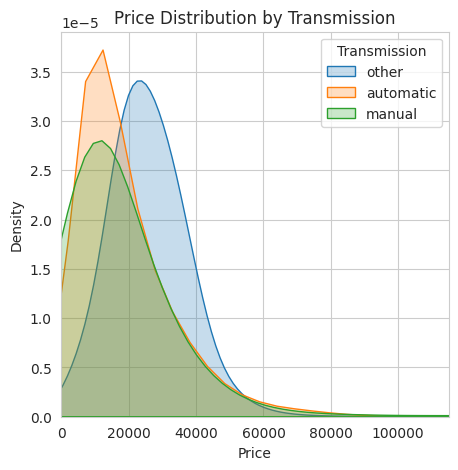

In [ ]:
# determine unique transmission
unique_transmission = cars['transmission'].unique()

n_transmission = len(unique_transmission)  # calculates the number of unique drive types

plt.figure(figsize=(5, 5))

# Plotting the KDE for each drive type
for transmission in unique_transmission:
    sns.kdeplot(cars[cars['transmission'] == transmission]['price'],
                label=transmission,
                fill=True,
                bw_adjust=3)  # Increase this value to make plot smoother

plt.title('Price Distribution by Transmission')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Transmission')
plt.xlim(0, 115000)
plt.show();


As shown already with our pricing distributions, all of the pricing distributions by transmission have a right skew to them. The distributions for manual and automatic are very similar, but automatic cars tend to be slightly more expensive on average.

The outlier here is the 'other' transmission types. Other transmission types include special transmission types such as dual-clutch transmissions and semi-automatic transmissions. These are more expensive due to the rarity and special use cases they are made for.

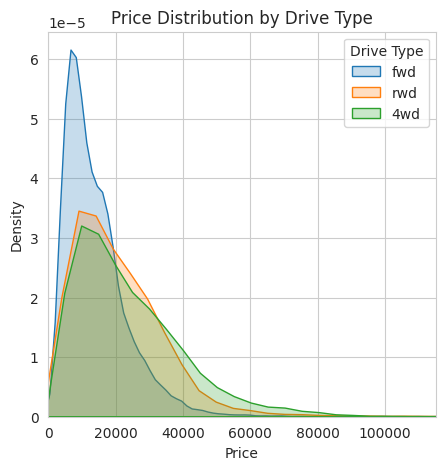

In [ ]:
# determine unique drive for fwd, rwd, and 4wd in order to create the correct number of subplots
unique_drives = cars['drive'].unique()

n_drives = len(unique_drives) # calculates the number of unique drive types

plt.figure(figsize=(5, 5))

# Plotting the KDE for each drive type
for drive in unique_drives:
    sns.kdeplot(cars[cars['drive'] == drive]['price'], label=drive, fill=True)

plt.title('Price Distribution by Drive Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Drive Type')
plt.xlim(0, 115000)
plt.show();

Based on the graph, front-wheel drive (fwd) vehicles predominantly fall within the lower price ranges, suggesting that fwd cars are generally more affordable than rear-wheel drive (rwd) and four-wheel drive (4wd) vehicles.

The rwd and 4wd cars tend to be more expensive since they are made for specialized use cases such as racing, drifiting, offroading and transporting.

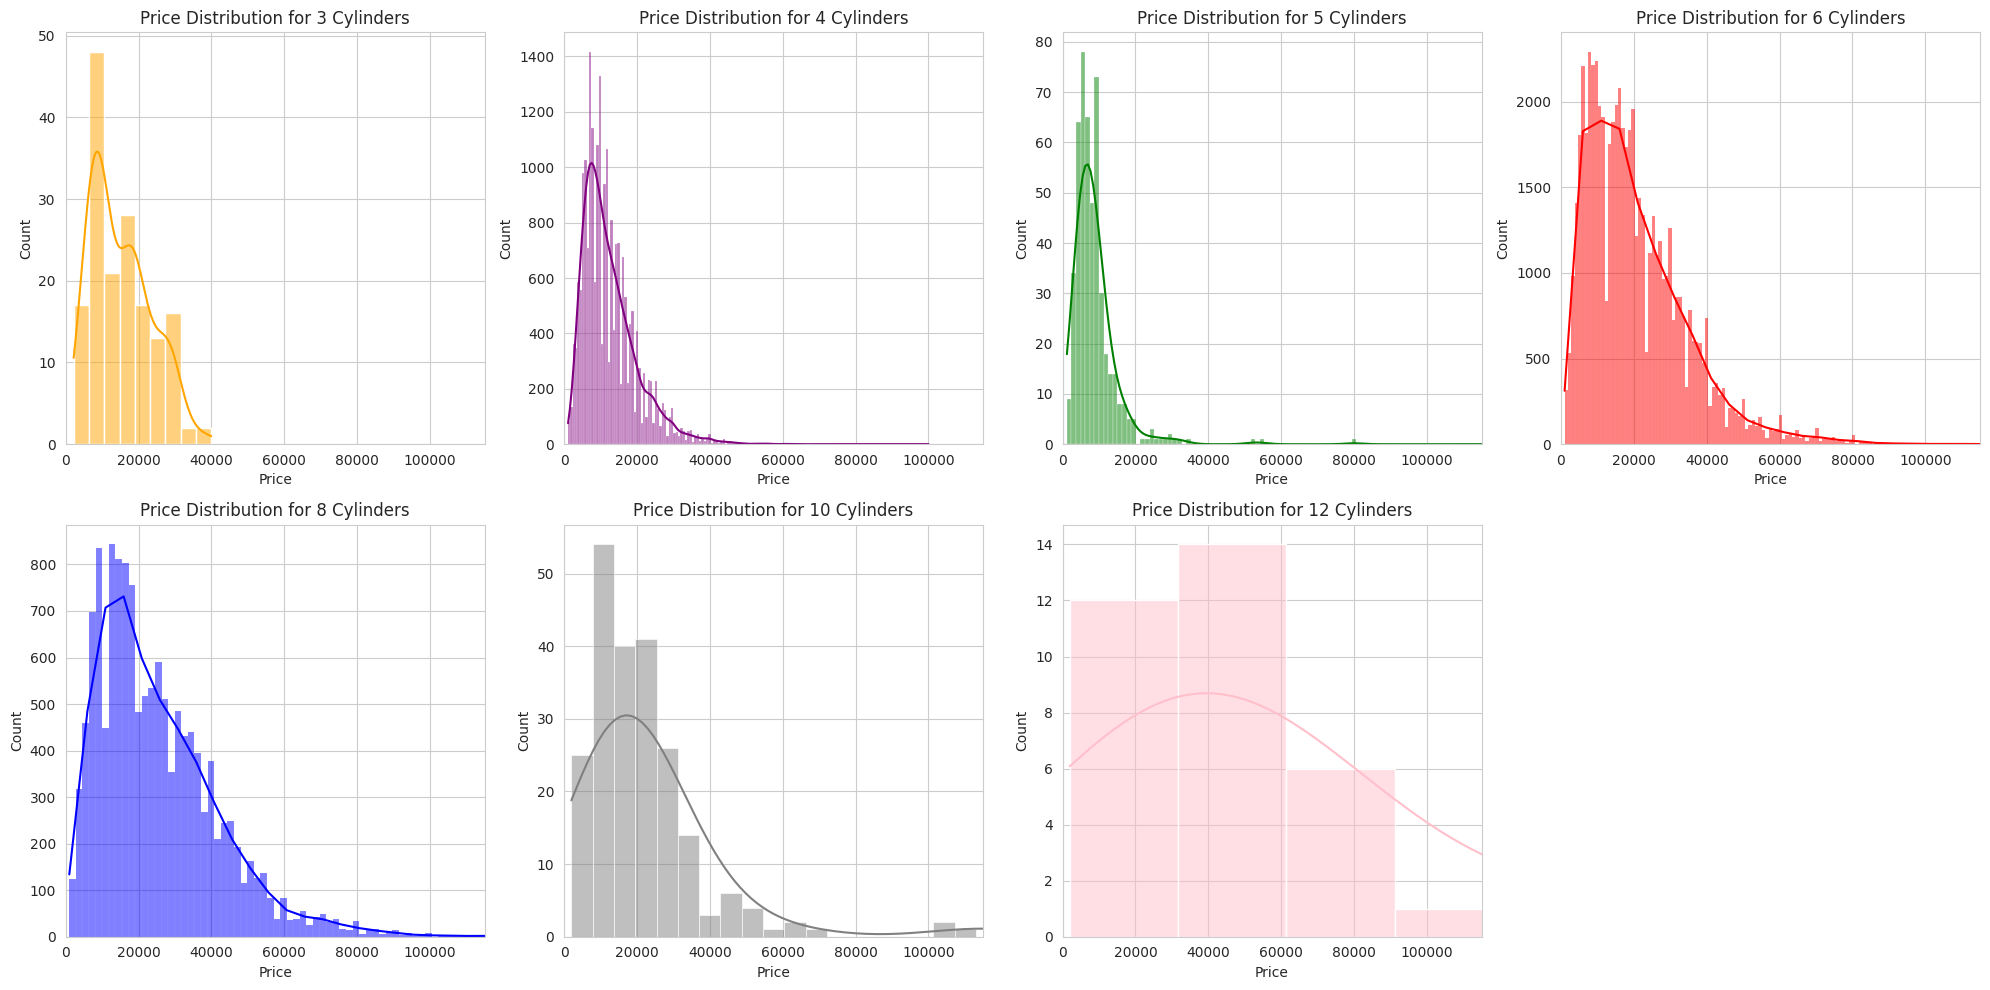

In [ ]:
# determine unique cylinder
unique_cylinders = cars['cylinders'].unique()

# Set the desired order for the cylinders
ordered_cylinders = [3, 4, 5, 6, 8, 10, 12]

colors = ['orange', 'purple', 'green', 'red', 'blue', 'grey', 'pink']

# Create subplots in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten 2D array of axes into 1D array for easier iteration
axes = axes.flatten()

# Create a histogram for each cylinder
for i, cylinders in enumerate(ordered_cylinders):
    sns.histplot(cars[cars['cylinders'] == cylinders]['price'], ax=axes[i], kde=True, color=colors[i])
    axes[i].set_title(f'Price Distribution for {cylinders} Cylinders')
    axes[i].set_xlabel('Price')
    axes[i].set_xlim(0, 115000)

# Remove the last unused subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.show();

Evidenced by the thinness of the bars, the graph reveals that 4-cylinder engines are a prevalent choice. Cars with this configuration are popular and typically more affordable for those buying used cars, aligning with general expectations.

Vehicles with 3 and 5 cylinders are rarer and exhibit a more modest price distribution. They are not really in demand and the prices reflect that.

In contrast, vehicles with 8, 10 and 12 cylinders, often associated with luxury and high performance, fall within a more premium price bracket.

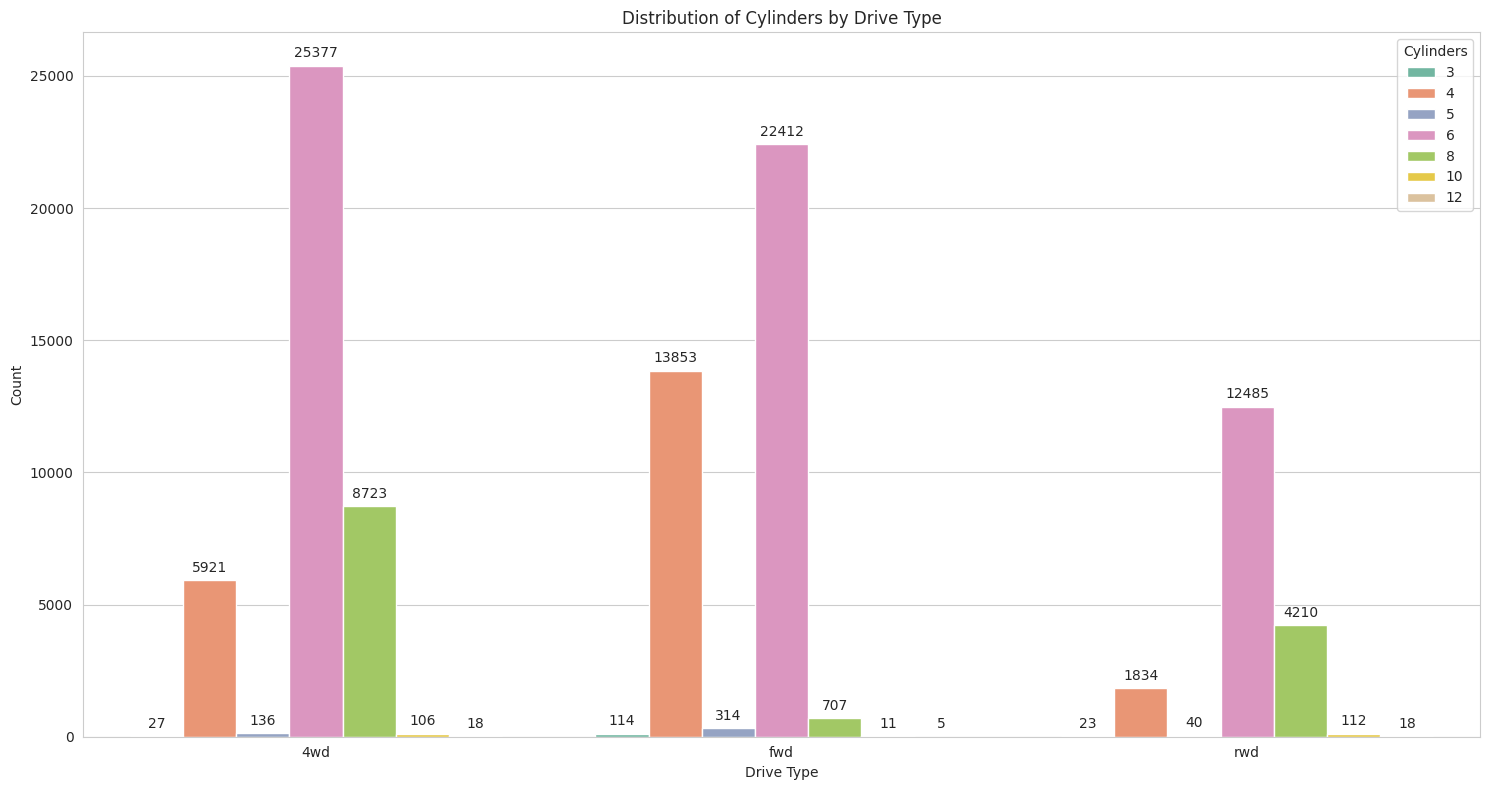

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='drive', hue='cylinders', data=cars, palette='Set2')

plt.title('Distribution of Cylinders by Drive Type')
plt.ylabel('Count')
plt.xlabel('Drive Type')
plt.legend(title='Cylinders')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show();

To confirm our findings from the last two graphs, we also calculated the count of cylinder numbers by drive type. We can see that 4 cylinder engines are common in fwd. The 4 cylinder engines and fwd combination is much preferred since it offers a good combination of fuel economy and safety. The prevalence of larger engines is seen in rwd and 4wd cars.

#### Odometer

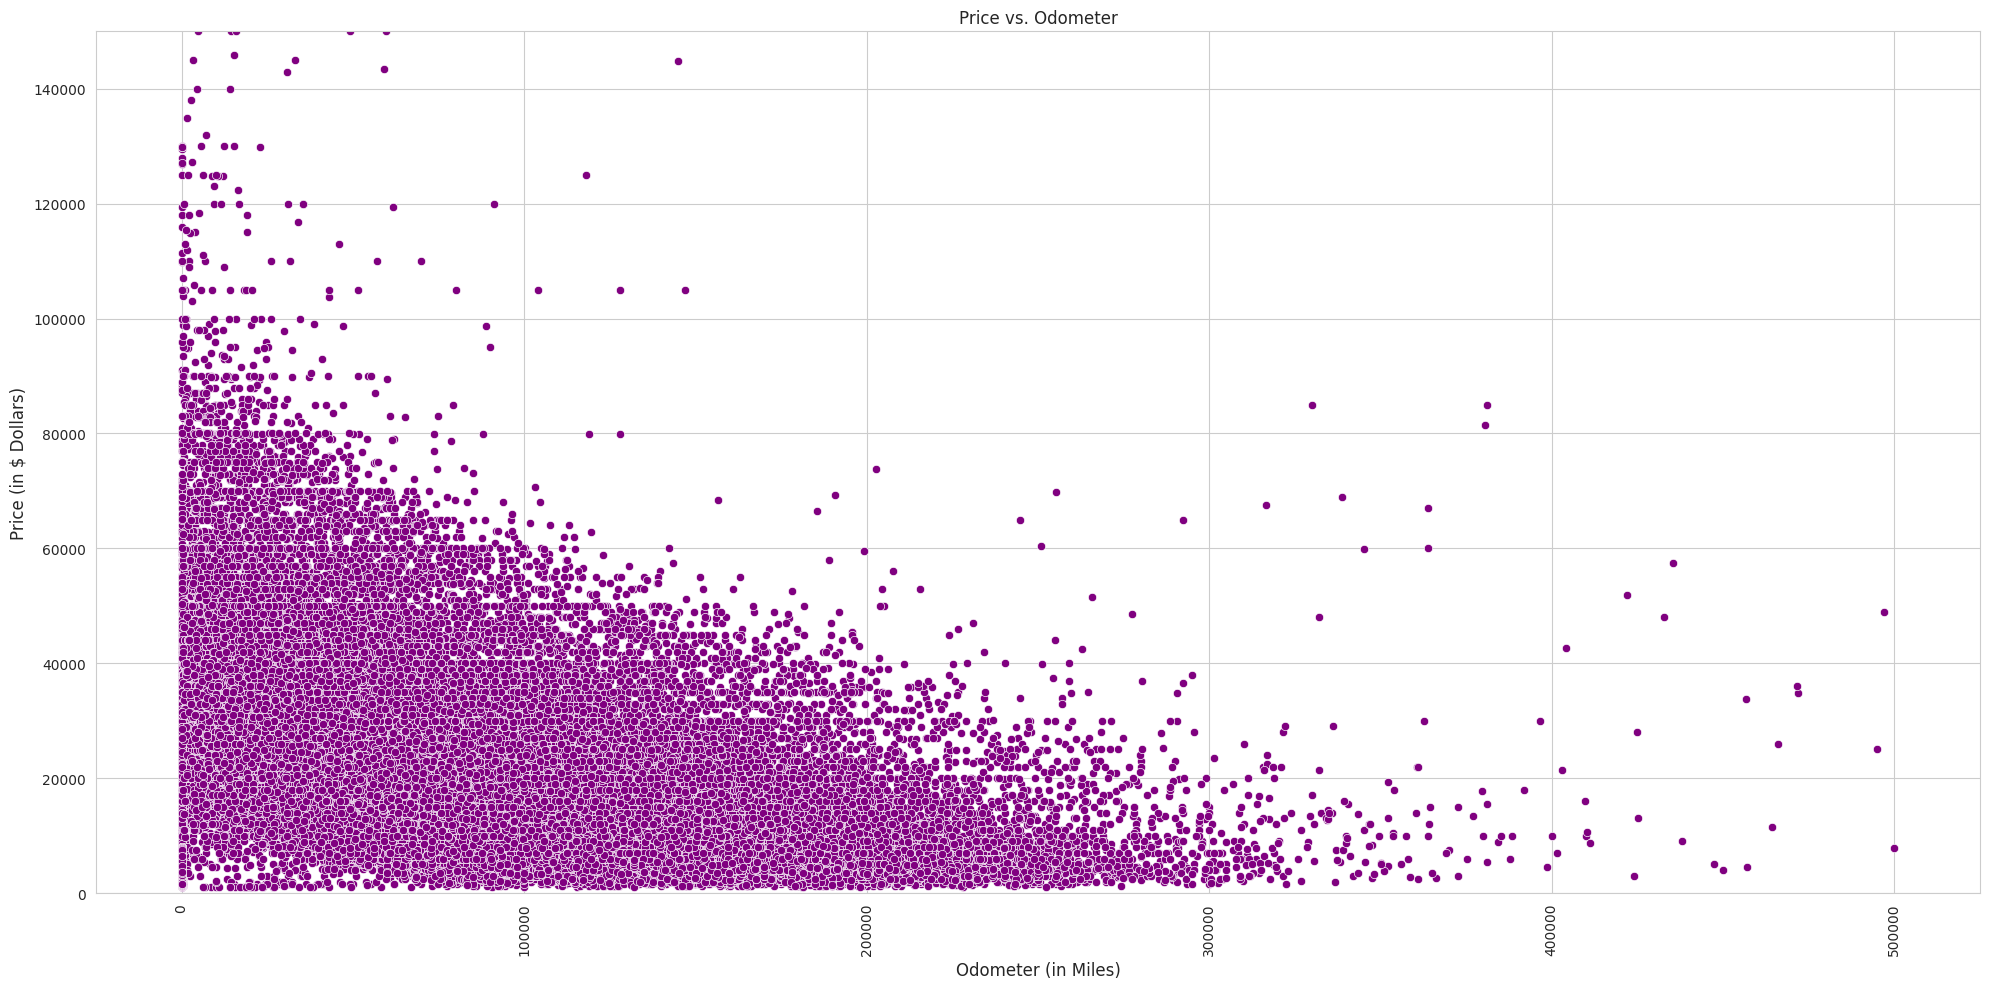

In [ ]:
plt.figure(figsize =(20,10))
sns.scatterplot(data= cars, y='price', x='odometer', color="purple")
plt.title("Price vs. Odometer")
plt.xlabel('Odometer (in Miles)',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.ylim(0,150000)
plt.tight_layout()
plt.show()

Finally, we move on to display the relationship between prices and odometer readings. We can clearly see the negative relationship between price and odometer here. The price of the cars decreases as the reading on the odometer increases.

To sum it up, the price of a used car is influenced by factors like engine size, fuel efficiency, drivability, performance, and odometer reading. The diverse pricing across drive types and cylinder counts highlights a multifaceted used car market that meets various consumer needs and desires.

### Manufacturer Trends

Which manufacturing years are most common? Did people prefer cars that were manufactured by a certain country's automakers (e.g. German?)

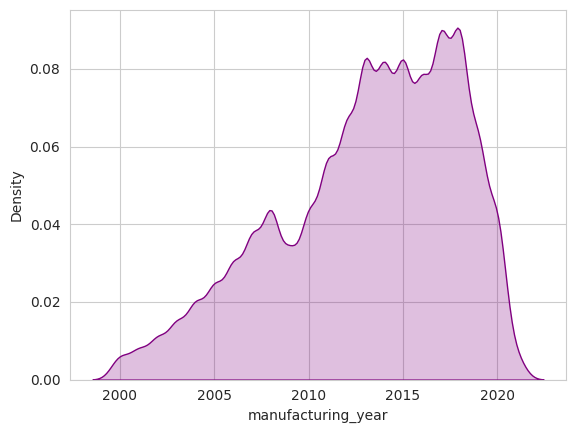

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(data=cars, x='manufacturing_year', color = 'purple', fill=True);

The presence of listings for cars manufactured between 2012 and 2020 is fairly similar. From 2000 to 2012, there is a consistent upward trend that is disturbed in 2009. This is likely due to the 2008 financial crisis, which had a severe impact on the automobile industry.

In [ ]:
dfMap = gpd.GeoDataFrame(cars, geometry = gpd.points_from_xy(cars.long, cars.lat))

In [ ]:
dfm = dfMap[(dfMap['lat'] > 19) & (dfMap['lat'] < 67) & (dfMap['long'] > -156) & (dfMap['long'] < -65)]
dfm = dfMap[(dfMap['lat'] > 19) & (dfMap['lat'] < 67) & (dfMap['long'] > -156) & (dfMap['long'] < -65)]

fig = px.scatter_mapbox(dfm, lat="lat", lon="long", hover_name="manufacture_country",
                       hover_data = ["manufacturer","price", "manufacturing_year", "state"],
                       zoom = 3, color = "manufacture_country" )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

The map above lets us explore manufacture countries in an interactive manner. This allows us to derive different insights based on our interests.

For example, one of the things we discovered was the popularity of German cars in urban centers vs that of Japenese cars in city outskirts. This is probably due to expensiveness of German cars vs Japanese cars and that Japanese cars are cheaper to maintain as well.

This difference is very well illustrated in Dallas Fort Worth.

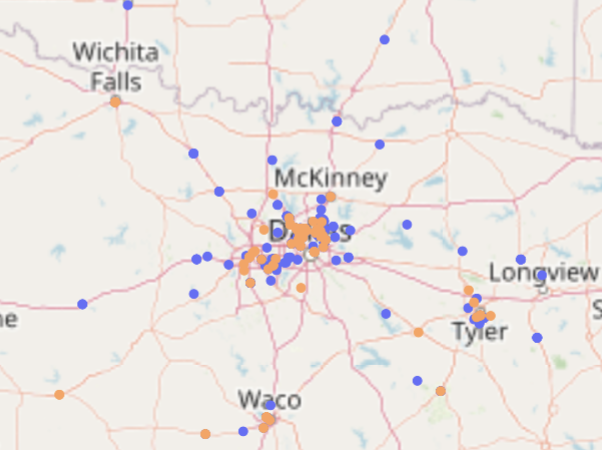

###Price by Color###

Text(0, 0.5, 'Price')

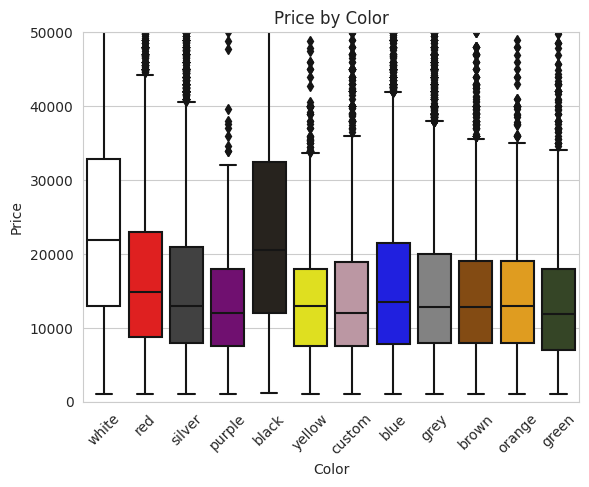

In [ ]:
# Price by Color

my_palette = {"white": "#FFFFFF", "blue": "#0000FF", "red":"#FF0000", "black" : "#28231D", "silver" : "#414141",
               "grey" : "#828282", "brown" : "#964B00", "orange" : "#FFA500",
               "yellow" : "#FFFF00", "purple" : "#800080", "green" : "#354A21", "custom" : "#C191A1"}

sns.boxplot(data = cars, y = 'price', x = 'paint_color', palette = my_palette)
plt.xticks(rotation = 45)
plt.title('Price by Color')
plt.xlabel('Color')
plt.ylim(0,50000)
plt.ylabel('Price')

We have used a _Boxplot_ to see the the range of the price for the different types of cars sold by color listed in the dataset.

**Black** and **White** cars have the greatest resale values compared to cars of other colors, which also ties in with a used car survey in 2023, which found that black and white were the most popular colours for used cars.

**Reference:** https://www.iseecars.com/most-popular-car-colors-study


## Price Prediction Model

We have choosen to train the price prediction model using mutliple linear regression.

There are multiple reasons for this:

1. Our analysis is a multivariate analysis. To predict price, we are using the following numerical features: manufacturing year, odometer, and cylinders. We are using the following categorical columns: fuels (5 features), drive types (3 features), manufacturers (40 features), and vehicle types (13 features)

2. We can handle the categorical columns using one-hot encoding. After one hot encoding, we will have 60 features in our model.

3. The assumption of linearity is reasonable for many pricing scenarios. While individual features may exhibit non-linear relationships, the collective impact of multiple features on price can often be adequately approximated using a linear model. For example, keeping all other factors equal, if the odometer reading increases from 10,000 miles to 50,000 miles, we can expect the price to decrease. On the other, if we keep all other factors equal, and change the drivetrain from front-wheel drive to 4-wheel drive, we can also expect the price to increase.

4. The simplicity of the multiple linear regression model makes it transparent and easy to communicate to our classmates (the stakeholders). This is important since most of us do not have knowledge of more advanced data science models yet.

### Training the Model

In [ ]:
# set target vector (y) and feature matrix (x)
x = cars[['manufacturing_year', 'odometer', 'cylinders', 'fuel', 'drive', 'manufacturer', 'type']]
y = cars['price']

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 39)

# encode categorical variables
x_train_encoded = pd.get_dummies(x_train, drop_first = True)
x_test_encoded = pd.get_dummies(x_test, drop_first = True)

# multiple linear regression fitting
regr = linear_model.LinearRegression()
regr.fit(x_train_encoded, y_train)

LinearRegression()

For training the model to predict price, we have utilized the following columns:

1. manufacturing year
2. odometer
3. cylinders
4. fuel type
5. drivetrain
6. manufacturer
7. type

There were other columns under consideration:

1. transmission: tried as part of the model, but only had a minor impact on price. increased r2 score from 63.1% to 63.2% only.
2. state: not included due to assumption that state would only marginally impact the model while adding substantial complexity to the coding and the training process.
3. model: not included due to the added substantial complexity to the coding and the training process.
4. size: not included due to assumption of collinearity with vehicle type.
5. manufacturer country: not included to due to assumption of collinearity with manufacturer.

### Validating the model

In [ ]:
# predict the accuracy score
y_prediction = regr.predict(x_test_encoded)

# R-squared score
score = r2_score(y_test, y_prediction)
print('r2 score is', score)

# Root Mean Squared Error
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print('root_mean_squared_error is', rmse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_prediction)
print('mean_absolute_error is', mae)

r2 score is 0.6370118063718082
root_mean_squared_error is 8838.45889061078
mean_absolute_error is 5591.922349917574


For validating the model, we have calculated the R squared score. The R squared score is 0.63. This means that the features included in the model account for 63% of the variability of the target variable (the price). The rest of the 37% is not captured by the model. The prices will be dependent on other factors such as the model, the region where the car is posted, and the condition. There will also be some variation due to inherent randomness which no model and no feature will be able to account for.

The RMSE is 8909 dollars. The MAE is 5669 dollars. Given our prices range from $0 to $1,000,000, these errors are not ideal but fall within an acceptable range.

The difference between the RSME and MAE indicates that the model has some predictions with relatively large errors.

### The Model (Feel free to play around!) (ChatGPT was used here to create the widgets)

In [ ]:
# Interactive widgets
manufacturing_year_dropdown = widgets.Dropdown(
    options=list(range(1950, 2021)),
    value=2010,
    description='Year:'
)

odometer_input = widgets.FloatText(
    value=15000,
    description='Odometer:'
)

cylinders_dropdown = widgets.Dropdown(
    options=[4, 6, 8, 10, 12],
    value=4,
    description='Cylinders:'
)

fuel_type_dropdown = widgets.Dropdown(
    options=['electric', 'gas', 'hybrid', 'other', 'diesel'],
    value='electric',
    description='Fuel Type:'
)

drive_type_dropdown = widgets.Dropdown(
    options=['fwd', 'rwd', '4wd'],
    value='fwd',
    description='Drive Type:'
)

manufacturer_dropdown = widgets.Dropdown(
    options=['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari',
             'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover',
             'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'porsche', 'ram',
             'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo'],
    value='acura',
    description='Manufacturer:'
)

type_dropdown = widgets.Dropdown(
    options=['bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon', 'SUV'],
    value='bus',
    description='Vehicle Type:'
)

predict_button = widgets.Button(description="Predict Price")
result_label = widgets.Label()

def predict_price(button):
    manufacturing_year = manufacturing_year_dropdown.value
    odometer = odometer_input.value
    cylinders = cylinders_dropdown.value
    fuel_type = fuel_type_dropdown.value
    drive_type = drive_type_dropdown.value
    manufacturer = manufacturer_dropdown.value
    type = type_dropdown

    # Create a dictionary with all features and set them to 0
    input_dict = {
        'year': manufacturing_year,
        'odometer': odometer,
        'cylinders': cylinders,
        'fuel_electric': 0,
        'fuel_gas': 0,
        'fuel_hybrid': 0,
        'fuel_other': 0,
        'drive_fwd': 0,
        'drive_rwd': 0,
        'manufacturer_alfa-romeo': 0,
        'manufacturer_aston-martin': 0,
        'manufacturer_audi': 0,
        'manufacturer_bmw': 0,
        'manufacturer_buick': 0,
        'manufacturer_cadillac': 0,
        'manufacturer_chevrolet': 0,
        'manufacturer_chrysler': 0,
        'manufacturer_dodge': 0,
        'manufacturer_ferrari': 0,
        'manufacturer_fiat': 0,
        'manufacturer_ford': 0,
        'manufacturer_gmc': 0,
        'manufacturer_harley-davidson': 0,
        'manufacturer_honda': 0,
        'manufacturer_hyundai': 0,
        'manufacturer_infiniti': 0,
        'manufacturer_jaguar': 0,
        'manufacturer_jeep': 0,
        'manufacturer_kia': 0,
        'manufacturer_land rover': 0,
        'manufacturer_lexus': 0,
        'manufacturer_lincoln': 0,
        'manufacturer_mazda': 0,
        'manufacturer_mercedes-benz': 0,
        'manufacturer_mercury': 0,
        'manufacturer_mini': 0,
        'manufacturer_mitsubishi': 0,
        'manufacturer_nissan': 0,
        'manufacturer_pontiac': 0,
        'manufacturer_porsche': 0,
        'manufacturer_ram': 0,
        'manufacturer_rover': 0,
        'manufacturer_saturn': 0,
        'manufacturer_subaru': 0,
        'manufacturer_tesla': 0,
        'manufacturer_toyota': 0,
        'manufacturer_volkswagen': 0,
        'manufacturer_volvo': 0,
        'type_bus': 0,
        'type_convertible': 0,
        'type_coupe': 0,
        'type_hatchback': 0,
        'type_mini-van': 0,
        'type_offroad': 0,
        'type_other': 0,
        'type_pickup': 0,
        'type_sedan': 0,
        'type_truck': 0,
        'type_van': 0,
        'type_wagon': 0

    }

    # Set the corresponding fuel type to 1
    if fuel_type == "electric" or fuel_type == "gas" or fuel_type == "hybrid" or fuel_type == "other":
      input_dict[f'fuel_{fuel_type}'] = 1

    # Set the corresponding drive type to 1
    if drive_type == "fwd" or drive_type == "rwd":
      input_dict[f'drive_{drive_type}'] = 1

    # Create list of manufacturers minus acura
    manu_list = ['alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari',
             'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover',
             'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'porsche', 'ram',
             'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo']
    # Set the corresponding manufacturer to 1
    if manufacturer in manu_list:
      input_dict[f'manufacturer_{manufacturer}'] = 1

    # Create list of types minus suv
    type_list = ['bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon']
    # Set the corresponding type to 1
    if type in type_list:
      input_dict[f'type_{type}'] = 1

    user_input = [list(input_dict.values())]  # Convert dictionary values to a list
    predicted_price = regr.predict(user_input)

    result_label.value = f"The predicted price is: ${predicted_price[0]:.2f}"

predict_button.on_click(predict_price)

display(manufacturer_dropdown, type_dropdown, manufacturing_year_dropdown, drive_type_dropdown, cylinders_dropdown, fuel_type_dropdown, odometer_input, predict_button, result_label)

Dropdown(description='Manufacturer:', options=('acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', …

Dropdown(description='Vehicle Type:', options=('bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroa…

Dropdown(description='Year:', index=60, options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1…

Dropdown(description='Drive Type:', options=('fwd', 'rwd', '4wd'), value='fwd')

Dropdown(description='Cylinders:', options=(4, 6, 8, 10, 12), value=4)

Dropdown(description='Fuel Type:', options=('electric', 'gas', 'hybrid', 'other', 'diesel'), value='electric')

FloatText(value=15000.0, description='Odometer:')

Button(description='Predict Price', style=ButtonStyle())

Label(value='')

## Challenges Documentation

We selected an open-source dataset from Craigslist, and dealing with the unregulated nature of user-generated content on a second-hand selling platform presented a significant challenge. During our exploratory phase, we encountered a large number of listings that lacked intuitive coherence. Through extensive data cleaning efforts, we managed to reduce the dataset from 426,880 to 96,306 listings, requiring thorough analysis before formal pre-processing. Notably, we observed that Craigslist listings were entered manually, often in a highly arbitrary manner. Vehicles were frequently mis-labelled under incorrect manufacturers, including non-existent ones, and displayed improbable manufacturing dates, ranging from the distant past to the distant future. Listings also extended beyond the geographical confines of the US, featuring exorbitant prices reaching up to USD 10 million and odometer readings exceeding 1 million miles.

In addition, certain columns in the dataset contained unstructured data, serving primarily to validate information in other columns. For example, the presence of an image could signal the listing's credibility. We grappled with defining the criteria for column and value retention, a task that required a combination of external references, course-based knowledge, and a passion for the automotive industry. Ultimately, these efforts culminated in a refined dataset capable of yielding valuable insights into the automotive market.

## Conclusion

In this project, we looked into the different trends of selling used cars in the US, with a focus on listings from Craigslist.

We comprehensively analysed the relationship between the different features of cars and their listing prices on Craigslist. We were able to identify the main variables that influenced used car prices, explore the geographic distributions of car listings and develop a predictive model to forecast pricing patterns.

We understood significant trends in used car pricing, explored the most frequently listed manufacturers across each state and analysed how features like a car's odometer and drive could impact its value. We investigated whether the most commonly sold used cars in the US were locally manufactured, or had international countries of origin, and assessed whether Craigslist listings were comparable to national car pricing trends.

Finally, we used our findings to select the features that had the most significant impact on car price listings, to train a predictive model using multiple linear regression. We have an interactive deliverable that is able to take in various attributes of a car, such as the manufacturer, odometer and type of vehicle, and predict what a car's price should be.

Our findings and model can prove significant if incorporated into a website like Craigslist. Sellers can verify if their planned listing price matches what a price "should" be, based on previous trends, and buyers can assess whether they are getting a fair listing price, based on the various features of a car.

## Citations

https://cars.usnews.com/cars-trucks/advice/best-luxury-car-brands

https://gunthertoodys.com/the-ford-mustang-americas-car/

https://www.bls.gov/news.release/wkyeng.nr0.htm

https://www.cnbc.com/2022/07/21/consumers-paying-average-10000-above-normal-prices-for-used-cars.html

https://www.iseecars.com/used-car-prices-by-state-study

https://www.yourdictionary.com/articles/state-abbreviations